<a href="https://colab.research.google.com/github/diegormsouza/automet/blob/main/AutoMET_03_SATELLITE_CASE_STUDIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

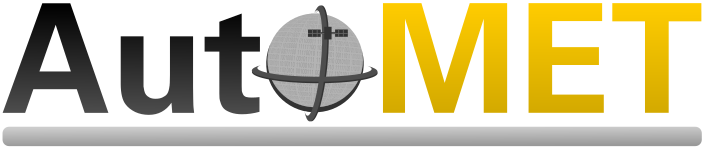

# **AutoMET - Facilitating Hands-on Activities for Satellite Meteorology Training**

# **Examples with Satellite Imagery (Case Studies - Satellites)**

**Developed by:** Diego Souza (https://github.com/diegormsouza) - INPE / CGCT / DISSM (Brazil)

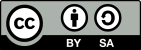

**Objective:**
- This solution was created to facilitate the access and visualization of satellite imagery and products, NWP data and other meteorological information using simple functions that anyone can use and adapt, **including those not familiarized with programming.** The examples run directly in the cloud, without the need of installing any tools (but it is also possible to adapt it and run the examples locally).   

**The Challenge:**
- During training events on satellite meteorology and related fields, we usually have a mixed audience (researchers, students, technicians, meteorologists, managers, etc). Hands-on programming activities are frequently demanded, but usually, most of the participants are not programmers, thus taking a considerable amount of time for them to be able to produce advanced images. This solution aims to create a simple way to motivate participants to learn programming by allowing them to download, process and visualize information by using simple functions. Then, if there is interest, they can understand how these functions work.

**Methodology:**
- Instead of going through the traditional learning steps (*general programming aspects -> visualizing images -> motivation*), this solution proposes another approach: *visualizing images -> motivation -> general programming concepts*.
This new approach has proved effective in recent training events.

**Supported Datasets (Jan 2024):**
- **Geostationary Ring (EUMETVIEW):** Global mosaics (every 3 hours) with GOES-East/West, Meteosat 0°, Meteosat 45.5° and Himawari data. Data available since June 06 2021 18:00 UTC
- **GOES-East and GOES-West (AWS):** 'goes16' data available since July 10 2017, 'goes17' since August 28 2018, 'goes18' since August 02 2022. Note: please consider that goes-16 generated images every 15 minutes (instead of 10) until a few months after launch
- **Meteosat 0° and Meteosat 45.5° (EUMDAC):** 'msg0' tested with data since March 26 2004 (every 15 minutes). 'msg45' tested with data since February 01 2017.
- **NWP:** open ecmwf data available for download since January 21 2022 00:00 ('2022-01-21 00:00'. gfs data available for download since February 26 2021 00:00 ('2021-02-26 00:00'). gfs products: 'pgrb2.0p25', 'pgrb2.0p50', 'pgrb2.1p00'.
- **METAR (UNIDATA)**: metar data available for the last 10 days, for each hour
- **EUMETSAT (LAND SAF and H SAF)**: A variety of products from the SAFs (Satellite Application Facilities).

**Note:** These examples were created primarily for use during capacity building activities but they can be adapted for operations as well.

---
The steps below demonstrates how to install and import the libraries, and some case studies using AutoMET.

# **Step 1: Checking the Virtual Machine Configuration**

In [ ]:
# verifying the installed O.S.
!cat /etc/issue
!uname -a
print('\n')

# verifying the available RAM
!grep MemTotal /proc/meminfo
print('\n')

# verifying the available HD space
!df -h
print('\n')

# verifying the default Python installation directory
!which python
print('\n')

# verifying the Python version
!python --version

Ubuntu 22.04.3 LTS \n \l

Linux 2907c6c3f09a 6.1.58+ #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


MemTotal:       13290480 kB


Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   45G   63G  42% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  849M  57% /usr/sbin/docker-init
tmpfs           6.4G   44K  6.4G   1% /var/colab
/dev/sda1        71G   54G   17G  77% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


/usr/local/bin/python


Python 3.10.12


# **Step 2: Installing the Necessary Libraries and Downloading Ancillary Files**

In this step we will install all the libraries needed for running the examples and download some auxiliary files.

**Notes:**
- It is only necessary to run this cell once (it takes a few minutes to complete the installation).
- After completion, you will see a popup saying there was an error. You can disregard and close the message.

In [ ]:
#==================================================================================================================#
# INSTALL THE REQUIRED LIBRARIES AND MODULES AND IMPORT ANCILLARY FILES
#==================================================================================================================#

# install libraries with conda (system package manager)
!pip install -q condacolab                                               # install conda and friends on Google Colab, easily
import condacolab                                                        # import condacolab
condacolab.install()                                                     # install condacolab
!conda config --add channels conda-forge                                 # configure conda channels
!conda config --set channel_priority strict                              # configure conda channel priorities
!sed -i '/cudatoolkit/d' /usr/local/conda-meta/pinned                    # necessary to avoid errors: https://stackoverflow.com/questions/77726543/trouble-installing-isce2-in-colab-cudatoolkit-12-2-is-missing-from-the-target
!mamba install -c conda-forge satpy netcdf4 pyproj pyspectral hdf5plugin # install libraries with conda

# install libraries with pip (package installer for Python)
!pip install herbie-data                                                 # retrieve NWP model data
!pip install eccodes                                                     # package developed by ECMWF for decoding and encoding messages
!pip install ecmwflibs                                                   # wraps some of ECMWF libraries to be used by Python interfaces to ECMWF software
!pip install git+https://github.com/blaylockbk/Carpenter_Workshop.git    # download utilities from past workshops
!pip install cffi==1.16.0                                                # foreign function interface for Python calling C code.
!pip install eumdac                                                      # provides simple access to the EUMETSAT data of all satellite missions
!pip install boto3                                                       # amazon web services (AWS) SDK for python
!pip install owslib                                                      # client programming with Open Geospatial Consortium (OGC) web service
!pip install rioxarray                                                   # rasterio xarray extension
!pip install cartopy                                                     # produce maps and other geospatial data analyses
!pip install shapely --no-binary shapely --force                         # for cartopy to run OK on Colab
!pip install ascat                                                       # install the ASCAT library

# download a shapefile with states and provinces of the world
!wget -c https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip

# unzip the shapefile with states and provinces
!unzip -o ne_10m_admin_1_states_provinces.zip

# download and unzip some example "CPT" files (color scales for plotting the satellite bands)
!wget -c https://github.com/diegormsouza/aemet_eumetsat_uruguay_2023/raw/main/ancillary/cpt_color_tables.zip
!unzip -o cpt_color_tables.zip

# download the utilities.py script with the load_CPT function
!wget -c https://raw.githubusercontent.com/diegormsouza/aemet_eumetsat_uruguay_2023/main/ancillary/utilities.py

# change some files (necessary for Satpy to work with CMIPF files):
!wget -c https://raw.githubusercontent.com/diegormsouza/aemet_eumetsat_uruguay_2023/main/ancillary/abi_l2_nc.py
!cp -f /content/abi_l2_nc.py /usr/local/lib/python3.10/site-packages/satpy/readers/abi_l2_nc.py
!wget -c https://raw.githubusercontent.com/diegormsouza/aemet_eumetsat_uruguay_2023/main/ancillary/test_abi_l2_nc.py
!cp -f /content/test_abi_l2_nc.py /usr/local/lib/python3.10/site-packages/satpy/tests/reader_tests/test_abi_l2_nc.py

# create a directory to save the PNGs so we can create animations
!mkdir -p output

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:31
🔁 Restarting kernel...

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.1) supported by @QuantStack

        GitHub:  https://github.com/mamba-org

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 MB 9.7 MB/s eta 0:00:00
  Cloning https://github.com/blaylockbk/Carpenter_Workshop.git to /tmp/pip-req-build-tsaufjmm
  Running command git clone --filter=blob:none --quiet https://github.com/blaylockbk/Carpenter_Workshop.git /tmp/pip-req-build-tsaufjmm
  Resolved https://github.com/blaylockbk/Carpenter_Workshop.git to commit 3eb6ee310d45ed6275ce2520006ec0aad3172e46
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for carpenter-workshop: filename=carpenter_workshop-2022.12.0-py3-none-any.whl size=2200448 sha256=edc6abf9a73090ac3c38a5437b504ec409b39ec6809bb2d05ebfe9156d5df68f
  Stored in directory: /tmp/pip-ephem-wheel-cache-kczzdahc/wheels/fc/90/17/3cca2094570e3e69fdd56bb5138b870fce21a6c71258194706
Successfully built carpenter-workshop
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.9/443.9 kB 12.1 MB/s eta 0:00:00
  Attempting 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.1/221.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.7 MB/s eta 0:00:00
DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
     ━━━━━━━━

# **Step 3: Importing the Necessary Modules**

In this step we will import the libraries installed in the previous step. Each library has a specific application, to be explored in the Python scripts. We will be working with GOES-East, GOES-West, METEOSAT, NWP and METAR data, so we will use a considerable amount of libraries.

**Note:** You only need to run this cell once.

In [ ]:
#==================================================================================================================#
# REQUIRED MODULES
#==================================================================================================================#

import os                                                       # miscellaneous operating system interfaces
import glob                                                     # unix style pathname pattern expansion
import zipfile                                                  # tools to create, read, write, append, and list a ZIP file
import shutil                                                   # high-level file operations
import requests                                                 # elegant and simple HTTP library for Python
import numpy as np                                              # import the Numpy package
import cartopy, cartopy.crs as ccrs                             # produce maps and other geospatial data analyses
import cartopy.feature as cfeature                              # common drawing and filtering operations
import cartopy.io.shapereader as shpreader                      # import shapefiles
import pyproj                                                   # python interface to PROJ (cartographic projections and coordinate transformations library)
import time                                                     # time access and conversions
import owslib                                                   # client programming with Open Geospatial Consortium (OGC) web service
from owslib.wms import WebMapService                            # owslib webmapservice
from datetime import timedelta, date, datetime                  # basic date and time types
from pyresample import geometry                                 # classes for describing different geographic areas using a mesh of points or pixels
import matplotlib                                               # comprehensive library for creating visualizations in Python
import matplotlib.pyplot as plt                                 # plotting library
import matplotlib.patheffects as PathEffects                    # define classes for path effects
from matplotlib.offsetbox import AnchoredText                   # adds an anchored text box in the corner
from matplotlib.offsetbox import OffsetImage                    # change the image size (zoom)
from matplotlib.offsetbox import AnnotationBbox                 # creates an annotation using an OffsetBox
from matplotlib import cm                                       # Colormap handling utilities
from utilities import loadCPT                                   # import the CPT convert function
from utilities import download_MCMIPF                           # function to download MCMIPF files
import eumdac                                                   # simple access to the EUMETSAT data of all satellite missions
import hdf5plugin                                               # for reading compressed data, a decompression library is needed
from satpy import Scene                                         # scene object to hold satellite data
from satpy import available_readers                             # available readers from satpy
from satpy.writers import get_enhanced_image                    # get an enhanced version of dataset as an XRImage instance
from herbie import Herbie                                       # retrieve NWP model data
from toolbox import EasyMap, pc                                 # utilities from previous workshops
from metpy.io import metar                                      # parse METAR-formatted data
from metpy.plots import current_weather, sky_cover, StationPlot # contains functionality for making meteorological plots
from metpy.calc import reduce_point_density                     # return a mask to reduce the density of points in irregularly-spaced data
from netCDF4 import Dataset                                     # read / write NetCDF4 files
from ascat.download.interface import hsaf_download              # download data from the hsaf server
import rioxarray                                                # rasterio xarray extension
import imageio                                                  # python interface to read and write a wide range of image data
import warnings                                                 # warning control
warnings.filterwarnings("ignore")                               # disable warnings

 ╭─▌▌Herbie─────────────────────────────────────────────╮
 │ INFO: Created a default config file.                 │
 │ You may view/edit Herbie's configuration here:       │
 │          /root/.config/herbie/config.toml            │
 ╰──────────────────────────────────────────────────────╯



/usr/local/lib/python3.10/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


# **Step 4 (Optional): EUMDAC User Credentials (EUMETSAT Data Services Client)**

This step is necessary **if you want to access and process METEOSAT data**.

To download data using the EUMDAC client (EUMETSAT Data Access Client), it is first necessary to register at https://eoportal.eumetsat.int/ and then access the following link: https://api.eumetsat.int/api-key/.

On this page, it is necessary to copy the keys **"Consumer key"** and **"Consumer secret"** and insert them in the variables of the following code cell.

**Note:** You only need to run this cell once. **If you will not work with METEOSAT data, it is NOT necessary to run this cell.**

In [ ]:
#==================================================================================================================#
# EUMDAC CREDENTIALS
#==================================================================================================================#

# EUMDAC (EUMETSAT Data Services Client) Access Token
# insert your personal key and secret into the single quotes below.
# first, create an account at this link: https://eoportal.eumetsat.int/
# and get the consumer key and secret at this link: https://api.eumetsat.int/api-key/
consumer_key = 'INSERT_YOUR_CONSUMER_KEY'
consumer_secret = 'INSERT_YOUR_CONSUMER_SECRET'

# verifying whether the creation of the Access Token was successful.
credentials = (consumer_key, consumer_secret)
token = eumdac.AccessToken(credentials)
try:
    print(f"This token '{token}' expires {token.expiration}")
except requests.exceptions.HTTPError as error:
    print(f"Error when tryng the request to the server: '{error}'")

This token '9d2834ad-c75f-3483-b144-26c17193c2e7' expires 2024-01-17 20:43:11.227545


# **Step 5: Loading Functions (Where the Hard Work is Done)**

To generate images we need to perform some operations (with different levels of complexity). To facilitate the manipulation of the data, some functions have been created to make the process easier. These functions are loaded by executing the following cell.

**Note:** You only need to run this cell once (it takes a few seconds to load).

In [ ]:
# @title Some functions for downloading and creating imagery (there's no need to expand this cell, just run it)

########################################################################################################################
# plot_ring: Function to download and visualize geoestationary ring data from EUMETView
# Author: Diego Souza (INPE/CGCT/DISSM)
########################################################################################################################

def plot_ring(date_sat, composite, resolution, area, extent, coast_color, countries_color, grid_color, overwrite, figsize):
  print(f'--------------------------------------------------------------------------------------------------------------------------------------')
  #==================================================================================================================#
  # USER INPUT (TIME / DATE, COMPOSITE AND REGION OF INTEREST)
  #==================================================================================================================#

  # select the date (UTC)
  # geo ring tested with data since June 06 2021 18:00 UTC (every 3 hours)
  download_date = date_sat

  # select the composite (the options below have been tested):
  # 'ir108', 'airmass', 'natural_color', 'ash', 'dust'
  composite = composite

  # select the area (the options below have been tested):
  # 'global', 'custom'
  area = area

  # select the 'custom' area extent (min lon, min lat, max lon, max lat)
  extent = extent

  # select the resolution (km) - min res.: 6
  resolution = resolution

  # select some colors and linewidths
  coastline_color = coast_color ; coastline_lw = 0.80
  countries_color = countries_color ; countries_lw = 0.50
  gridlines_color = grid_color ; gridlines_lw = 0.15

  #==================================================================================================================#
  # DATA DOWNLOAD
  #==================================================================================================================#

  # convert the date to separate variables
  year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
  hour=int(download_date[11:13]); minute=int(download_date[14:16])

  # check if hour is multiple of 3
  if (hour % 3 != 0):
    print("Please select another hour (data vailable every 3 hours).")

  # start the time counter
  start_counter = time.time()

  # download directory
  dir='/content/sample_data/'

  # file name prefix
  RegionName='GLOBAL'

  # some definitions according to the composite
  if composite == 'ir108':
      Service='mumi'
      product_name='worldcloudmap_ir108'
  elif composite == 'airmass':
      Service='mumi'
      product_name='wideareacoverage_rgb_airmass'
  elif composite == 'natural_color':
      Service='mumi'
      product_name='wideareacoverage_rgb_natural'
  elif composite == 'ash':
      Service='mumi'
      product_name='wideareacoverage_rgb_ash'
  elif composite == 'dust':
      Service='mumi'
      product_name='wideareacoverage_rgb_dust'

  # file name definition
  file_name = f'{RegionName}_{Service}_{product_name}_{str(year).zfill(4)}-{str(month).zfill(2)}-{str(day).zfill(2)}T{str(hour).zfill(2)}-{str(minute).zfill(2)}Z.tif'

  # choose the product
  target_layer = Service+':'+product_name

  # global region
  lon_min=-180; lat_min=-90; lon_max=180; lat_max=90

  # km per degree
  km_per_degree = 111.32

  # calculate the total number of degrees in lat and lon extent
  deg_lon = lon_max - lon_min
  deg_lat = lat_max - lat_min

  # calculate the number of pixels (width and height)
  xsize = int((km_per_degree * deg_lon) /  resolution)
  ysize = int((km_per_degree * deg_lat) /  resolution)

  # size definition
  bbox=(lon_min,lat_min,lon_max,lat_max)
  size=(xsize,ysize)

  # web map service definition
  service_url = 'https://view.eumetsat.int/geoserver/ows?'
  wms = WebMapService(service_url)

  # get the wms image
  def get_wms_image (dt,wms_layer,bbox,size):

      timewindow=(dt+timedelta(hours=-0.25)).strftime("%Y-%m-%dT%H:%M:%SZ")+"/"+(dt.strftime("%Y-%m-%dT%H:%M:%SZ"))
      payload = {
          'layers' : [wms_layer],
          'styles' : '',
          'format' : 'image/geotiff', # format
          'crs'    : 'EPSG:4326',     # projection
          'bbox'   : bbox,            # BBOX and Size needs to match
          'size'   : size,
          'time' : timewindow
      }
      wms = WebMapService(service_url)
      print(f'Downloading the following file from EUMETView: {file_name}')
      img_response = wms.getmap(**payload, timeout=120)
      img=img_response.read()
      return img

  # check the datespan (in this notebook only a single date is downloaded)
  def datespan(startDate, endDate, delta=timedelta(days=1)):
      currentDate = startDate
      while currentDate < endDate:
          yield currentDate
          currentDate += delta

  # individual variables
  YEAR=year; MONTH=month; DAY_INI=day
  DAY_FIN=day; H_INI=hour; H_FIN=hour
  M_INI=minute; M_FIN=minute+1; DELTA_MIN=30

  # create filenames based on the timestamp
  for timestamp in datespan(datetime(YEAR, MONTH, DAY_INI, H_INI, M_INI),
                            datetime(YEAR, MONTH, DAY_FIN, H_FIN, M_FIN),
                            delta=timedelta(minutes=DELTA_MIN)):
      filename=RegionName+'_'+Service+'_'+product_name+'_'+timestamp.strftime("%Y-%m-%dT%H-%MZ")+".tif"

  # download the geotiff file
  if overwrite == False:  # it will not download the file if it exists
      from pathlib import Path
      my_file = Path(f'{dir}{file_name}')
      if my_file.is_file():
        print('This file already exists...')
      else:
        img=get_wms_image (timestamp,target_layer,bbox,size)
        with open(dir+filename, 'wb') as f:
          f.write(img)
          f.close()
  else: # it will check if the file exists, delete it and download it again
      from pathlib import Path
      my_file = Path(f'{dir}{file_name}')
      if my_file.is_file():
        print('Deleting the old file...')
        os.remove(my_file)

      img=get_wms_image (timestamp,target_layer,bbox,size)
      with open(dir+filename, 'wb') as f:
          f.write(img)
          f.close()

  #==================================================================================================================#
  # PLOT THE SATELLITE DATA
  #==================================================================================================================#

  print(f'\nPlotting the file:')
  print(f'{dir}{file_name}\n')

  # open the geotiff file with reioxarray:
  raster = rioxarray.open_rasterio(f'{dir}{file_name}')

  # if it is a single band geotiff
  if composite == 'ir108':
    # read the raster band as separate variable
    data = raster[0]

    # convert to float64 datatype
    data = np.float64(data)
    data[data == 0] = np.nan

  # if it is a multiband geotiff (3 bands - R, G and B)
  elif composite == 'airmass' or composite == 'natural_color' or composite == 'ash' or composite == 'dust':
    # read the raster band as separate variable
    data_1 = raster[0]
    # read the raster band as separate variable
    data_2 = raster[1]
    # read the raster band as separate variable
    data_3 = raster[2]
    # Create the RGB stack
    rgb = np.stack([data_1, data_2, data_3], axis=2)

  # plot size (width x height, in inches)
  plt.figure(figsize=figsize)

  # declare ax as global (so it can be used be subsequent plots)
  global ax

  # reference for the metar plot
  global crs
  crs = ccrs.PlateCarree()

  # use the cylindrical projection in cartopy
  ax = plt.axes(projection=ccrs.PlateCarree())

  # define the image extent
  img_extent = [-180.0, 180.00, -90.00, 90.00]

  # if 'global' is selected, use an specific extent
  if area == 'global':
      extent = [-180.0, -70.00, 180.00, 70.00]
  ax.set_extent([extent[0], extent[2], extent[1], extent[3]], crs=ccrs.PlateCarree())

  # add coastlines, borders and gridlines
  ax.coastlines(resolution='50m', color=coastline_color, linewidth=coastline_lw)
  ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=countries_lw)

  # add gridlines
  gl = ax.gridlines(crs=ccrs.PlateCarree(), color=gridlines_color, alpha=1.0, linestyle='--', linewidth=gridlines_lw,
  xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
  gl.top_labels = False; gl.right_labels = False
  gl.xpadding = -5; gl.ypadding = -5
  gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
  gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

  # plot the final image
  if (composite == 'ir108'):
    # converts a CPT file to be used in Python
    cpt = loadCPT('IR4AVHRR6.cpt'); cmap = cm.colors.LinearSegmentedColormap('cpt', cpt)
    vmin = -30.0; vmax = 250.0
    # plot the image
    img = ax.imshow(data, origin='upper', vmin=vmin, vmax=vmax, extent=img_extent, cmap=cmap.reversed())
  elif composite == 'airmass' or composite == 'natural_color' or composite == 'ash' or composite == 'dust':
    # plot the image
    img = ax.imshow(rgb, origin='upper', extent=img_extent)

  # add a title
  plt.title(f'Geostationary Ring (EUMETVIEW) - {composite}\n{download_date} UTC\nAutoMET' , fontweight='bold', fontsize=10, loc='left')

  # save the image
  img_file = f'output/georing_{composite}_{download_date.replace(" ", "_")}.png'
  plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

  # show the image
  #plt.show()

  # print to total time required to process the file
  print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
  print(f'--------------------------------------------------------------------------------------------------------------------------------------')

  # return the image file name
  return img_file

########################################################################################################################
# plot_sat: Function to download and visualize goes16, goes17, goes18 (AWS) and msg0 / msg45 (EUMDAC)
# Author: Diego Souza (INPE/CGCT/DISSM)
########################################################################################################################

def plot_sat(sat, date_sat, composite, area, extent, coast_color, countries_color, grid_color, figsize):
  # declare ax as global (so it can be used be subsequent plots)
  global ax
  if sat == 'goes16' or sat == 'goes17' or sat =='goes18':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    #==================================================================================================================#
    # USER INPUT (TIME / DATE, COMPOSITE AND REGION OF INTEREST)
    #==================================================================================================================#

    # select the satellite ('goes16', 'goes17' or 'goes18')
    satellite = sat

    # select the date (UTC)
    # 'goes16' since July 10 2017, 'goes17' since August 28 2018, 'goes18' since August 02 2022
    # note: please consider that goes-16 generated images every 15 minutes (instead of 10) until a few months after launch
    download_date = date_sat

    # select the composite (the options below have been tested):
    # 'C01, 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16'
    # 'airmass', 'ash', 'cimss_cloud_type', 'cimss_true_color', 'cimss_true_color_sunz_rayleigh', 'cira_day_convection', 'cira_fire_temperature', 'cloud_phase',
    # 'cloud_phase_distinction', 'cloudtop', 'color_infrared', 'colorized_ir_clouds', 'convection', 'day_microphysics', 'dust', 'fire_temperature_awips', 'fog',
    # 'green_snow', 'land_cloud', 'natural_color', 'night_fog', 'night_microphysics', 'overview', 'rocket_plume_day', 'rocket_plume_night', 'snow', 'so2',
    # 'tropical_airmass', 'true_color', 'water_vapors1', 'water_vapors2'
    composite = composite

    # select the area (the options below have been tested):
    # 'full_disk', 'custom', 'southamerica', 'brazil', 'goes_east_abi_c_2km', 'northamerica_10km', 'goes_west_abi_p_2km', 'worldeqc3km', 'worldeqc30km', 'moll'
    area = area

    # select the 'custom' area extent (min lon, min lat, max lon, max lat)
    extent = extent

    # select some colors and linewidths
    coastline_color = coast_color ; coastline_lw = 0.80
    countries_color = countries_color ; countries_lw = 0.50
    gridlines_color = grid_color ; gridlines_lw = 0.15

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    # start the time counter
    start_counter = time.time()

    # download directory
    dir='/content/sample_data/'; os.makedirs(dir, exist_ok=True)
    path_to_testdata = dir

    # datetime to process
    yyyymmddhhmn = f'{download_date[0:4]}{download_date[5:7]}{download_date[8:10]}{download_date[11:13]}{download_date[14:16]}'

    # download the file
    file_name = download_MCMIPF(satellite, yyyymmddhhmn, dir)

    # calculate the julian day
    year = int(download_date[0:4]); month = int(download_date[5:7]); day = int(download_date[8:10]); hour = int(download_date[11:13]); minute = int(download_date[14:16])
    julian = datetime(year, month, day, hour, minute).timetuple().tm_yday

    #==================================================================================================================#
    # CUSTOM AREA
    #==================================================================================================================#

    # create a custom area to be used with Satpy (cylindrical equidistant projection)
    if area == 'custom':
      # pyproj definitions
      P = pyproj.Proj(proj='eqc', ellps='WGS84', preserve_units=True)
      G = pyproj.Geod(ellps='WGS84')
      x1,y1 = P(extent[0],extent[1])
      x2,y2 = P(extent[2],extent[3])

      # define km per degree
      km_per_degree = 111.32

      # calculate the total number of degrees in lat and lon extent
      deg_lon = extent[2] - extent[0]
      deg_lat = extent[3] - extent[1]

      # calculate the number of pixels (width and height)
      resolution = 4.0
      width = (km_per_degree * deg_lon) /  resolution
      height = (km_per_degree * deg_lat) /  resolution

      # creating an area definition on the fly
      area_id = 'my_area'
      description = 'custom area'
      proj_id = 'my_area'
      x_size = int(width)
      y_size = int(height)
      area_extent = (x1,y1,x2,y2)
      proj_dict = {'a': 6378169.0, 'b': 6378169.0,'units': 'm', 'lon_0': 0.0,'proj': 'eqc', 'lat_0': 0.0}
      area_def = geometry.AreaDefinition(area_id, description, proj_id, proj_dict, x_size, y_size, area_extent)

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # log message
    print(f'\nPlotting the file:')
    print(glob.glob(os.path.join(path_to_testdata, f'{dir}OR_ABI-L2-MCMIPF*G{satellite[-2:]}*s{str(year).zfill(4)}{str(julian).zfill(3)}{str(hour).zfill(2)}{str(minute).zfill(2)}*.nc'))[0] + '\n')

    # initialise Scene
    scn = Scene(filenames=glob.glob(os.path.join(path_to_testdata, f'{dir}OR_ABI-L2-MCMIPF*G{satellite[-2:]}*s{str(year).zfill(4)}{str(julian).zfill(3)}{str(hour).zfill(2)}{str(minute).zfill(2)}*.nc')), reader='abi_l2_nc')
    print(scn)

    # load the datasets/composites of interest
    # the upper_right_corner='NE' argument flips it automatically in upright position
    scn.load([composite], upper_right_corner='NE')

    # plot size (width x height, in inches)
    plt.figure(figsize=(figsize))

    # declare ax and crs as global (so they can be used be subsequent plots)
    global ax
    global crs

    # check if it is a full disk plot, a cropped full disk regional or a reprojected region
    if area == 'full_disk':
        # read the crs and set the extent for the full disk
        crs = scn[composite].attrs['area'].to_cartopy_crs()
        longitude = float((str(crs)[str(crs).find("origin")+6:str(crs).find("Height")]).split(",")[1])
        ax = plt.axes(projection=ccrs.Geostationary(central_longitude=longitude, satellite_height=35786023.0))
        img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)

        # add coastlines, borders and gridlines
        ax.coastlines(resolution='50m', color=coastline_color, linewidth=coastline_lw)
        ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=countries_lw)

        # add gridlines
        gl = ax.gridlines(crs=ccrs.PlateCarree(), color=gridlines_color, alpha=1.0, linestyle='--', linewidth=gridlines_lw,
        xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=False)

    elif area == 'custom_geo':
        # if not, resample the scene to a specified area
        scene_crop = scn.crop(ll_bbox=(extent[0],  extent[1], extent[2], extent[3]))

        # read the crs
        crs = scene_crop[composite].attrs['area'].to_cartopy_crs()

        # define the projection and add coastlines and gridlnes
        ax = plt.axes(projection=crs)

        # add coastlines, borders and gridlines
        ax.coastlines(resolution='10m', color=coastline_color, linewidth=coastline_lw)
        ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=countries_lw)

        # add gridlines
        gl = ax.gridlines(crs=ccrs.PlateCarree(), color=gridlines_color, alpha=1.0, linestyle='--', linewidth=gridlines_lw,
        xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
        gl.top_labels = False; gl.right_labels = False
        gl.xpadding = -5; gl.ypadding = -5
        gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
        gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    elif area == 'custom':
        # if not, resample the scene to a specified area
        scn_resampled = scn.resample(area_def, resampler='nearest', radius_of_influence=50000)

        # read the crs
        crs = scn_resampled[composite].attrs['area'].to_cartopy_crs()

        # define the projection and add coastlines and gridlnes
        ax = plt.axes(projection=crs)

        # add coastlines, borders and gridlines
        ax.coastlines(resolution='10m', color=coastline_color, linewidth=coastline_lw)
        ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=countries_lw)

        # add gridlines
        gl = ax.gridlines(crs=ccrs.PlateCarree(), color=gridlines_color, alpha=1.0, linestyle='--', linewidth=gridlines_lw,
        xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
        gl.top_labels = False; gl.right_labels = False
        gl.xpadding = -5; gl.ypadding = -5
        gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
        gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}


    # check if it is a single channel or a composite and if it is a full disk or a sub-region
    single_channel = False
    # if it is a single band, select the appropriate color scale
    if (composite in scn.available_dataset_names()):
        # visible bands
        if (composite == 'C01' or composite == 'C02' or composite == 'C03' or composite == 'C04' or composite == 'C05' or composite == 'C06'):
            # converts a CPT file to be used in Python
            cpt = loadCPT('Square Root Visible Enhancement.cpt'); cmap = cm.colors.LinearSegmentedColormap('cpt', cpt)
            vmin = 0.0; vmax = 100.0; dif = 0
        # 3.9 micron band
        elif (composite == 'C07'):
            # converts a CPT file to be used in Python
            cpt = loadCPT('SVGAIR2_TEMP.cpt'); cmap = cm.colors.LinearSegmentedColormap('cpt', cpt)
            vmin = -112.15; vmax = 56.85; dif = 273.15
        # water vapour bands
        elif (composite == 'C08' or composite == 'C09' or composite == 'C10'):
            # converts a CPT file to be used in Python
            cpt = loadCPT('SVGAWVX_TEMP.cpt'); cmap = cm.colors.LinearSegmentedColormap('cpt', cpt)
            vmin = -112.15; vmax = 56.85; dif = 273.15
        # IR bands
        elif (composite == 'C11' or composite == 'C12' or composite == 'C13' or composite == 'C14' or composite == 'C15' or composite == 'C16'):
            # converts a CPT file to be used in Python
            cpt = loadCPT('IR4AVHRR6.cpt'); cmap = cm.colors.LinearSegmentedColormap('cpt', cpt)
            vmin = -103.0; vmax = 84.0; dif = 273.15
        # check if it is a full disk plot
        if area == 'full_disk':
            # remove the outline border
            ax.spines['geo'].set_visible(False)
            # show the image
            im = plt.imshow(scn[composite] - dif, extent=img_extent, vmin=vmin, vmax=vmax, origin='upper', cmap=cmap)
        elif area == 'custom_geo':
            # show the image
            im = plt.imshow(scene_crop[composite] - dif, transform=crs, extent=crs.bounds, vmin=vmin, vmax=vmax, origin='upper', cmap=cmap)
        elif area == 'custom':
            # show the image
            im = plt.imshow(scn_resampled[composite] - dif, transform=crs, extent=crs.bounds, vmin=vmin, vmax=vmax, origin='upper', cmap=cmap)
        single_channel = True
    # if it is an RGB, plot the RGB
    else:
        # check if it is a full disk plot, a cropped full disk regional or a reprojected region
        if area == 'full_disk':
            # remove the outline border
            ax.spines['geo'].set_visible(False)
            # read the composite
            rgb = np.moveaxis(get_enhanced_image(scn[composite]).data.values, 0, -1)
            # show the image
            im = plt.imshow(rgb, extent=img_extent, origin='upper')
        elif area == 'custom_geo':
            rgb = np.moveaxis(get_enhanced_image(scene_crop[composite]).data.values, 0, -1)
            # show the image
            im = plt.imshow(rgb, transform=crs, extent=crs.bounds, origin='upper')
        elif area == 'custom':
            rgb = np.moveaxis(get_enhanced_image(scn_resampled[composite]).data.values, 0, -1)
            # show the image
            im = plt.imshow(rgb, transform=crs, extent=crs.bounds, origin='upper')

    # read the time and date from the metadata
    date = scn[composite].attrs['start_time']
    date = date.strftime('%Y-%m-%d %H:%M UTC')

    # add a title
    if single_channel == True:
      wavelenght = scn[composite].attrs['wavelength']
      plt.title(f'{satellite.upper()[:4]}-{satellite[4:]} - {composite} - {wavelenght}\n{date}\nAutoMET' , fontweight='bold', fontsize=10, loc='left')
    else:
      plt.title(f'{satellite.upper()[:4]}-{satellite[4:]} - {composite}\n{date}\nAutoMET' , fontweight='bold', fontsize=10, loc='left')

    # save the image
    img_file = f'output/{satellite}_{composite}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # show the image
    #plt.show()

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # return the image file name
    return img_file

  elif sat == 'msg0' or sat == 'msg45':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    #==================================================================================================================#
    # USER INPUT (TIME / DATE, COMPOSITE AND REGION OF INTEREST)
    #==================================================================================================================#
    # select the date (UTC)
    # MSG 0° tested with data since March 26 2004 (every 15 minutes)
    download_date = date_sat

    # select the composite (the options below have been tested):
    # 'VIS006', 'VIS008', 'IR_016', 'IR_039', 'WV_062', 'WV_073', 'IR_087', 'IR_097', 'IR_108', 'IR_120', 'IR_134'
    # 'airmass', 'ash', 'cloudtop', 'cloudtop_daytime', 'colorized_ir_clouds', 'convection', 'day_microphysics' 'day_microphysics_winter',
    # 'dust', 'fog', 'green_snow', 'ir108_3d', 'ir_overview', 'natural_color', 'natural_color_nocorr', 'natural_color_raw',
    # 'natural_color_raw_with_night_ir', 'natural_color_with_night_ir', 'natural_enh', 'natural_with_night_fog', 'night_fog', 'night_ir_alpha',
    # 'night_microphysics', 'overview', 'overview_raw', 'rocket_plume_night', 'snow'
    composite = composite

    # select the area (the options below have been tested):
    # 'full_disk', 'custom', 'SouthAmerica', 'south_america', 'southamerica', 'SouthAmerica_flat', 'brazil', 'brazil2, 'eurol', 'worldeqc3km', 'worldeqc30km', 'moll'
    area = area

    # select the 'custom' area extent (min lon, min lat, max lon, max lat)
    extent = extent

    # select some colors and linewidths
    coastline_color = coast_color ; coastline_lw = 0.80
    countries_color = countries_color ; countries_lw = 0.50
    gridlines_color = grid_color ; gridlines_lw = 0.15

    # satellite
    satellite = sat

    # declare eumdac consumer key and secret as global variables
    global consumer_key
    global consumer_secret

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    # start the time counter
    start_counter = time.time()

    # convet date strings to ints
    year = int(download_date[0:4]); month = int(download_date[5:7]); day = int(download_date[8:10]); hour = int(download_date[11:13]); minute = int(download_date[14:16])

    # insert your personal key and secret into the single quotes
    # first, create an account at this link: https://eoportal.eumetsat.int/
    # and get the consumer key and secret at this link: https://api.eumetsat.int/api-key/
    consumer_key = consumer_key
    consumer_secret = consumer_secret
    # verifying whether the creation of the Access Token was successful.
    credentials = (consumer_key, consumer_secret)
    token = eumdac.AccessToken(credentials)
    try:
        print('Checking the EUMDAC Access Token...')
        print(f'This Token {token} expires {token.expiration}\n')
    except requests.exceptions.HTTPError as error:
        print(f'Unexpected error: {error}\n')

    # data store and selected collection
    datastore = eumdac.DataStore(token)
    if sat == 'msg0':
      selected_collection = datastore.get_collection('EO:EUM:DAT:MSG:HRSEVIRI')
      sat_name = 'MSG 0°'
    elif sat == 'msg45':
      selected_collection = datastore.get_collection('EO:EUM:DAT:MSG:HRSEVIRI-IODC')
      sat_name = 'MSG 45.5°'

    # download time and date
    start = datetime(year, month, day, hour, minute)
    end = datetime(year, month, day, hour, minute+1)
    products = selected_collection.search(dtstart=start, dtend=end)

    # download directory
    dir='/content/sample_data/'; os.makedirs(dir, exist_ok=True)
    path_to_testdata = dir

    # check if file exists. if not, download and unzip the file
    for product in products:
      print(f'Checking if the file already exists: {dir}{str(product)}.zip')
      if os.path.exists(dir+str(product)+'.zip'):
          print('This file already exists.\n')
      else:
          print('This file doesn\'t exist.\n')
          with product.open() as fsrc, open(dir+fsrc.name, mode='wb') as fdst:
              print(f'Downloading the following file: {dir+fsrc.name}')
              shutil.copyfileobj(fsrc, fdst)
              print(f'Download finished.\n')
              # unzip the downloaded file
          with zipfile.ZipFile(f'{dir}{str(product)}.zip', 'r') as zip_ref:
              zip_ref.extractall(dir)
              print('The file has been uncompressed.\n')

    #==================================================================================================================#
    # CUSTOM AREA
    #==================================================================================================================#

    # create a custom area to be used with Satpy (cylindrical equidistant projection)
    if area == 'custom':
      # pyproj definitions
      P = pyproj.Proj(proj='eqc', ellps='WGS84', preserve_units=True)
      G = pyproj.Geod(ellps='WGS84')
      x1,y1 = P(extent[0],extent[1])
      x2,y2 = P(extent[2],extent[3])

      # define km per degree
      km_per_degree = 111.32

      # calculate the total number of degrees in lat and lon extent
      deg_lon = extent[2] - extent[0]
      deg_lat = extent[3] - extent[1]

      # calculate the number of pixels (width and height)
      resolution = 4.0
      width = (km_per_degree * deg_lon) /  resolution
      height = (km_per_degree * deg_lat) /  resolution

      # creating an area definition on the fly
      area_id = 'my_area'
      description = 'custom area'
      proj_id = 'my_area'
      x_size = int(width)
      y_size = int(height)
      area_extent = (x1,y1,x2,y2)
      proj_dict = {'a': 6378169.0, 'b': 6378169.0,'units': 'm', 'lon_0': 0.0,'proj': 'eqc', 'lat_0': 0.0}
      area_def = geometry.AreaDefinition(area_id, description, proj_id, proj_dict, x_size, y_size, area_extent)

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # log message
    print(f'Plotting the file: {dir}{str(product)}.nat\n')

    # initialise Scene
    scn = Scene(filenames=glob.glob(os.path.join(path_to_testdata, f'{str(product)}.nat')), reader='seviri_l1b_native')

    # load the datasets/composites of interest.
    # the upper_right_corner='NE' argument flips it automatically in upright position
    scn.load([composite], upper_right_corner='NE')

    # plot size (width x height, in inches)
    plt.figure(figsize=(figsize))

    # check if it is a full disk plot, a cropped full disk regional or a reprojected region
    if area == 'full_disk':
        # read the crs and set the extent for the full disk
        crs = scn[composite].attrs['area'].to_cartopy_crs()
        longitude = float((str(crs)[str(crs).find("origin")+6:str(crs).find("Height")]).split(",")[1])
        ax = plt.axes(projection=ccrs.Geostationary(central_longitude=longitude, satellite_height=35785831.0))
        img_extent = (-5570248.686685662,5567248.28340708,-5567248.28340708, 5570248.686685662)

        # add coastlines, borders and gridlines
        ax.coastlines(resolution='50m', color=coastline_color, linewidth=coastline_lw)
        ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=countries_lw)

        # add gridlines
        gl = ax.gridlines(crs=ccrs.PlateCarree(), color=gridlines_color, alpha=1.0, linestyle='--', linewidth=gridlines_lw,
        xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=False)

    elif area == 'custom_geo':
        # if not, resample the scene to a specified area
        scene_crop = scn.crop(ll_bbox=(extent[0],  extent[1], extent[2], extent[3]))

        # read the crs
        crs = scene_crop[composite].attrs['area'].to_cartopy_crs()

        # define the projection and add coastlines and gridlnes
        ax = plt.axes(projection=crs)

        # add coastlines, borders and gridlines
        ax.coastlines(resolution='10m', color=coastline_color, linewidth=coastline_lw)
        ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=countries_lw)

        # add gridlines
        gl = ax.gridlines(crs=ccrs.PlateCarree(), color=gridlines_color, alpha=1.0, linestyle='--', linewidth=gridlines_lw,
        xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
        gl.top_labels = False; gl.right_labels = False
        gl.xpadding = -5; gl.ypadding = -5
        gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
        gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    elif area == 'custom':
        # if not, resample the scene to a specified area
        scn_resampled = scn.resample(area_def, resampler='nearest', radius_of_influence=50000)

        # read the crs
        crs = scn_resampled[composite].attrs['area'].to_cartopy_crs()

        # define the projection and add coastlines and gridlnes
        ax = plt.axes(projection=crs)

        # add coastlines, borders and gridlines
        ax.coastlines(resolution='10m', color=coastline_color, linewidth=coastline_lw)
        ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=countries_lw)

        # add gridlines
        gl = ax.gridlines(crs=ccrs.PlateCarree(), color=gridlines_color, alpha=1.0, linestyle='--', linewidth=gridlines_lw,
        xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
        gl.top_labels = False; gl.right_labels = False
        gl.xpadding = -5; gl.ypadding = -5
        gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
        gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # check if it is a single channel or a composite and if it is a full disk or a sub-region
    single_channel = False
    # if it is a single band, select the appropriate color scale
    if (composite in scn.available_dataset_names()):
        # visible bands
        if (composite == 'VIS006' or composite == 'VIS008' or composite == 'IR_016'):
            # converts a CPT file to be used in Python
            cpt = loadCPT('Square Root Visible Enhancement.cpt'); cmap = cm.colors.LinearSegmentedColormap('cpt', cpt)
            vmin = 0.0; vmax = 100.0; dif = 0
        # 3.9 micron band
        elif (composite == 'IR_039'):
            # converts a CPT file to be used in Python
            cpt = loadCPT('SVGAIR2_TEMP.cpt'); cmap = cm.colors.LinearSegmentedColormap('cpt', cpt)
            vmin = -112.15; vmax = 56.85; dif = 273.15
        # water vapour bands
        elif (composite == 'WV_062' or composite == 'WV_073'):
            # converts a CPT file to be used in Python
            cpt = loadCPT('SVGAWVX_TEMP.cpt'); cmap = cm.colors.LinearSegmentedColormap('cpt', cpt)
            vmin = -112.15; vmax = 56.85; dif = 273.15
        # IR bands
        elif (composite == 'IR_087' or composite == 'IR_097' or composite == 'IR_108' or composite == 'IR_120' or composite == 'IR_134'):
            # converts a CPT file to be used in Python
            cpt = loadCPT('IR4AVHRR6.cpt'); cmap = cm.colors.LinearSegmentedColormap('cpt', cpt)
            vmin = -103.0; vmax = 84.0; dif = 273.15

        single_channel = True

        # check if it is a full disk plot, a cropped full disk regional or a reprojected region
        if area == 'full_disk':
            # remove the outline border
            ax.spines['geo'].set_visible(False)
            # show the image
            im = plt.imshow(scn[composite] - dif, extent=img_extent, vmin=vmin, vmax=vmax, origin='upper', cmap=cmap)
        elif area == 'custom_geo':
            # show the image
            im = plt.imshow(scene_crop[composite] - dif, transform=crs, extent=crs.bounds, vmin=vmin, vmax=vmax, origin='upper', cmap=cmap)
        elif area == 'custom':
            # show the image
            im = plt.imshow(scn_resampled[composite] - dif, transform=crs, extent=crs.bounds, vmin=vmin, vmax=vmax, origin='upper', cmap=cmap)

    # if it is an RGB, plot the RGB
    else:
        # check if it is a full disk plot
        if area == 'full_disk':
            # remove the outline border
            ax.spines['geo'].set_visible(False)
            # read the composite
            rgb = np.moveaxis(get_enhanced_image(scn[composite]).data.values, 0, -1)
            # show the image
            im = plt.imshow(rgb, extent=img_extent, origin='upper')
        elif area == 'custom_geo':
            rgb = np.moveaxis(get_enhanced_image(scene_crop[composite]).data.values, 0, -1)
            # show the image
            im = plt.imshow(rgb, transform=crs, extent=crs.bounds, origin='upper')
        elif area == 'custom':
            rgb = np.moveaxis(get_enhanced_image(scn_resampled[composite]).data.values, 0, -1)
            # show the image
            im = plt.imshow(rgb, transform=crs, extent=crs.bounds, origin='upper')

    # read the time and date from the metadata
    date = scn[composite].attrs['start_time']
    date = date.strftime('%Y-%m-%d %H:%M UTC')

    # add a title
    if single_channel == True:
      wavelenght = scn[composite].attrs['wavelength']
      plt.title(f'{sat_name} - {composite} - {wavelenght}\n{date}\nAutoMET' , fontweight='bold', fontsize=10, loc='left')
    else:
      plt.title(f'{sat_name} - {composite}\n{date}\nAutoMET' , fontweight='bold', fontsize=10, loc='left')

    # save the image
    img_file = f'output/{satellite}_{composite}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # show the image
    #plt.show()

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # return the image file name
    return img_file

########################################################################################################################
# download_satellite: Function to download goes16, goes17, goes18 (AWS) and msg0 / msg45 (EUMDAC)
# Author: Diego Souza (INPE/CGCT/DISSM)
########################################################################################################################

def download_satellite(sat, date_sat):
  print(f'--------------------------------------------------------------------------------------------------------------------------------------')
  # check the selected satellite
  if sat == 'goes16' or sat == 'goes17' or sat =='goes18':
    #==================================================================================================================#
    # USER INPUT (TIME / DATE, COMPOSITE AND REGION OF INTEREST)
    #==================================================================================================================#

    # select the satellite ('goes16', 'goes17' or 'goes18')
    satellite = sat

    # select the date (UTC)
    # 'goes16' since July 10 2017, 'goes17' since August 28 2018, 'goes18' since August 02 2022
    # note: please consider that goes-16 generated images every 15 minutes (instead of 10) until a few months after launch
    download_date = date_sat

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    # start the time counter
    start_counter = time.time()

    # download directory
    dir='/content/sample_data/'; os.makedirs(dir, exist_ok=True)

    # datetime to process
    yyyymmddhhmn = f'{download_date[0:4]}{download_date[5:7]}{download_date[8:10]}{download_date[11:13]}{download_date[14:16]}'

    # download the file
    file_name = download_MCMIPF(satellite, yyyymmddhhmn, dir)

    # print to total time required to download the file
    print('Total download time:', round((time.time() - start_counter),2), 'seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # return the downloaded file name
    return str(file_name) + '.nc'

  # check the selected satellite
  elif sat == 'msg0' or sat == 'msg45':
    #==================================================================================================================#
    # USER INPUT (TIME / DATE, COMPOSITE AND REGION OF INTEREST)
    #==================================================================================================================#

    # select the date (UTC)
    # MSG 0° tested with data since March 26 2004 (every 15 minutes)
    download_date = date_sat

    # declare eumdac consumer key and secret as global variables
    global consumer_key
    global consumer_secret

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    # start the time counter
    start_counter = time.time()

    # convet date strings to ints
    year = int(download_date[0:4]); month = int(download_date[5:7]); day = int(download_date[8:10]); hour = int(download_date[11:13]); minute = int(download_date[14:16])

    # insert your personal key and secret into the single quotes
    # first, create an account at this link: https://eoportal.eumetsat.int/
    # and get the consumer key and secret at this link: https://api.eumetsat.int/api-key/
    consumer_key = consumer_key
    consumer_secret = consumer_secret
    # verifying whether the creation of the Access Token was successful
    credentials = (consumer_key, consumer_secret)
    token = eumdac.AccessToken(credentials)
    try:
        print('Checking the EUMDAC Access Token...')
        print(f'This Token {token} expires {token.expiration}\n')
    except requests.exceptions.HTTPError as error:
        print(f'Unexpected error: {error}\n')

    # data store and selected collection
    datastore = eumdac.DataStore(token)
    if sat == 'msg0':
      selected_collection = datastore.get_collection('EO:EUM:DAT:MSG:HRSEVIRI')
      sat_name = 'MSG 0°'
    elif sat == 'msg45':
      selected_collection = datastore.get_collection('EO:EUM:DAT:MSG:HRSEVIRI-IODC')
      sat_name = 'MSG 45.5°'

    # download time and date
    start = datetime(year, month, day, hour, minute)
    end = datetime(year, month, day, hour, minute+1)
    products = selected_collection.search(dtstart=start, dtend=end)

    # download directory
    dir='/content/sample_data/'; os.makedirs(dir, exist_ok=True)

    # check if file exists. if not, download and unzip the file
    for product in products:
      print(f'Checking if the file already exists: {dir}{str(product)}.zip')
      if os.path.exists(dir+str(product)+'.zip'):
          print('This file already exists.\n')
      else:
          print('This file doesn\'t exist.\n')
          with product.open() as fsrc, open(dir+fsrc.name, mode='wb') as fdst:
              print(f'Downloading the following file: {dir+fsrc.name}')
              shutil.copyfileobj(fsrc, fdst)
              print(f'Download finished.\n')
              # unzip the downloaded file
          with zipfile.ZipFile(f'{dir}{str(product)}.zip', 'r') as zip_ref:
              zip_ref.extractall(dir)
              print('The file has been uncompressed.\n')

    # print to total time required to download the file
    print('Total download time:', round((time.time() - start_counter),2), 'seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # return the downloaded file name
    file_name = product
    return str(file_name) + '.nat'

########################################################################################################################
# plot_nwp: This function will download and plot open data from ECMWF and GFS
# Author: Diego Souza (INPE/CGCT/DISSM),
# using Herbie (Blaylock, B. K. (2023). Herbie: Retrieve Numerical Weather Prediction Model Data (Version 2023.3.0)
# [Computer software]. https://github.com/blaylockbk/Herbie)
########################################################################################################################

def plot_nwp(model, product, date_nwp, area, extent, fxx, var, scale, offset, level_hpa, level_min, level_max, level_int, plot_type, contour_color, apply_cmap, cmap,
             view_clabel, fontsize, linewidth, linestyle, land_ocean, land_color, ocean_color, alpha, title, figsize):
  print(f'--------------------------------------------------------------------------------------------------------------------------------------')
  # start the time counter
  start_counter = time.time()

  #==================================================================================================================#
  # PLOT THE NWP DATA
  #==================================================================================================================#

  # convet date strings to ints
  year = int(date_nwp[0:4]); month = int(date_nwp[5:7]); day = int(date_nwp[8:10]); hour = int(date_nwp[11:13]); minute = int(date_nwp[14:16])

  # if using the forecast time as date, the plot will have the valid time as the date
  if fxx == 'date':
    multiple = 3
    number = hour
    # calculate the nearest fxx based in the hour
    fxx = multiple * round(number / multiple)
  else:
    # plot an specific forecast time (not the "valid" one from the date)
    fxx = fxx

  # create a Herbie object
  H = Herbie(f'{str(year).zfill(4)}-{str(month).zfill(2)}-{str(day).zfill(2)}', model=model, product=product, fxx=fxx)

  # check the desired variable and depending o variable, read the dataset accordingly
  # streamlines
  if var == 'winds':
    # read the dataset
    ds = H.xarray(f':(v|u):{level_hpa}')
    # calculate the windspeed
    ws = np.sqrt(ds.u**2 + ds.v**2)
    print(ws.shape)
  # wind speed
  elif var == 'windspeed':
    # read the dataset
    ds = H.xarray(f':(v|u):{level_hpa}')
    # calculate the windspeed
    ws = np.sqrt(ds.u**2 + ds.v**2)
  # thickness
  elif var == 'thickness':
    # read the dataset
    ds1 = H.xarray(f":gh:{level_hpa.split(',')[0]}")
    # read the dataset
    ds2 = H.xarray(f":gh:{level_hpa.split(',')[1]}")
  # vertical velocity
  elif var == 'VVEL':
    # read the dataset
    ds = H.xarray(f':{var}:{level_hpa}')
    var = 'w'
  # 2 m temperature
  elif var == '2t':
    # read the dataset
    ds = H.xarray(f':{var}:{level_hpa}')
    var = 't2m'
    if cmap == 'custom':
      # create a custom color scale:
      # The reference color palette may be found at the following page: http://wxmaps.org/pix/temp8
      # You may get the hex files st the following page: https://imagecolorpicker.com/
      colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0",
      "#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c",
      "#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c",
      "#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046",
      "#8c6359", "#b48b82", "#e1beb4"]
      cmap = matplotlib.colors.ListedColormap(colors)
      cmap.set_over('#fadad5')
      cmap.set_under('#e5e5e5')
  # low cloud cover
  elif var == 'LCDC':
    # read the dataset
    ds = H.xarray(f':{var}:{level_hpa}')
    var = 'lcc'
  # medium cloud cover
  elif var == 'MCDC':
    # read the dataset
    ds = H.xarray(f':{var}:{level_hpa}')
    var = 'mcc'
  # high cloud cover
  elif var == 'HCDC':
    # read the dataset
    ds = H.xarray(f':{var}:{level_hpa}')
    var = 'hcc'
  # total cloud cover
  elif var == 'TCDC':
    # read the dataset
    ds = H.xarray(f':{var}:{level_hpa}')
    var = 'tcc'
  # other variables
  else:
    # read the dataset
    ds = H.xarray(f':{var}:{level_hpa}')

  # declare ax as global (so it can be used be subsequent plots)
  global ax

  # check the desired area (previous or custom)
  if area == 'previous':
    print(f'\nUsing the same area of the previous plot...\n')
  elif area == 'custom':
    # choose the plot size (width x height, in inches)
    plt.figure(figsize=(figsize))
    # use the Cilindrical Equidistant projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())
    # define the image extent
    img_extent = [extent[0], extent[2], extent[1], extent[3]]
    ax.set_extent([extent[0], extent[2], extent[1], extent[3]], crs=ccrs.PlateCarree())
    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)
    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color='black', linewidth=1.0)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=1.0)
    # add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.5,
    xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False; gl.right_labels = False
    gl.xpadding = -5; gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

  # check the plot type. depending on the plot type, create the plot accordingly
  # unfilled contour
  if plot_type == 'c_unfilled':
    # thickness
    if var == 'thickness':
      if apply_cmap == False:
        # contours (unfilled) for ds
        img1 = ax.contour(ds1.longitude, ds1.latitude, ds2.gh/scale - ds1.gh*scale, transform=pc, colors=contour_color, linewidths=linewidth, linestyles=linestyle, levels=np.arange(level_min, level_max, level_int), alpha=alpha)
      elif apply_cmap == True:
        # contours (unfilled) for ds
        img1 = ax.contour(ds1.longitude, ds1.latitude, ds2.gh/scale - ds1.gh*scale, transform=pc, cmap=cmap, linewidths=linewidth, linestyles=linestyle, levels=np.arange(level_min, level_max, level_int), alpha=alpha)
      if view_clabel == True:
        # labels for ds
        ax.clabel(img1, inline=1, inline_spacing=0, fontsize=fontsize, fmt = '%1.0f', colors=contour_color)
    # windspeed
    elif var == 'windspeed':
      if apply_cmap == False:
        # contours (unfilled) for ds
        img1 = ax.contour(ds.longitude, ds.latitude, ws, transform=pc, colors=contour_color, linewidths=linewidth, linestyles=linestyle, levels=np.arange(level_min, level_max, level_int), alpha=alpha)
      elif apply_cmap == True:
        # contours (unfilled) for ds
        img1 = ax.contour(ds.longitude, ds.latitude, ws, transform=pc, cmap=cmap, linewidths=linewidth, linestyles=linestyle, levels=np.arange(level_min, level_max, level_int), alpha=alpha)
      if view_clabel == True:
        # labels for ds
        ax.clabel(img1, inline=1, inline_spacing=0, fontsize=fontsize, fmt = '%1.0f', colors=contour_color, alpha=alpha)
    # low, medium or high cloud cover
    elif var == 'lcc' or var == 'mcc' or var == 'hcc':
      if apply_cmap == False:
        # contours (unfilled) for ds
        img1 = ax.contour(ds.longitude, ds.latitude, (getattr(ds, var.lower())*scale+offset)[0], transform=pc, colors=contour_color, linewidths=linewidth, linestyles=linestyle, levels=np.arange(level_min, level_max, level_int), alpha=alpha)
      elif apply_cmap == True:
        # contours (unfilled) for ds
        img1 = ax.contour(ds.longitude, ds.latitude,  (getattr(ds, var.lower())*scale+offset)[0], transform=pc, cmap=cmap, linewidths=linewidth, linestyles=linestyle, levels=np.arange(level_min, level_max, level_int), alpha=alpha)
      if view_clabel == True:
        # labels for ds
        ax.clabel(img1, inline=1, inline_spacing=0, fontsize=fontsize, fmt = '%1.0f', colors=contour_color)
    # other variables
    else:
      if apply_cmap == False:
        # contours (unfilled) for ds
        img1 = ax.contour(ds.longitude, ds.latitude, getattr(ds, var.lower())*scale+offset, transform=pc, colors=contour_color, linewidths=linewidth, linestyles=linestyle, levels=np.arange(level_min, level_max, level_int), alpha=alpha)
      elif apply_cmap == True:
        # contours (unfilled) for ds
        img1 = ax.contour(ds.longitude, ds.latitude, getattr(ds, var.lower())*scale+offset, transform=pc, cmap=cmap, linewidths=linewidth, linestyles=linestyle, levels=np.arange(level_min, level_max, level_int), alpha=alpha)
      if view_clabel == True:
        # labels for ds
        ax.clabel(img1, inline=1, inline_spacing=0, fontsize=fontsize, fmt = '%1.0f', colors=contour_color)

  # filled contour
  elif plot_type == 'c_filled':
    # thickness
    if var == 'thickness':
      # contours (filled) for ds
      img1 = ax.contourf(ds.longitude, ds.latitude, ds2.gh*scale - ds1.gh*scale, transform=pc, cmap=cmap, levels=np.arange(level_min, level_max, level_int), extend='both', alpha=alpha)
      # contours (unfilled) for ds
      img2 = ax.contour(ds.longitude, ds.latitude, ds2.gh*scale - ds1.gh*scale, transform=pc, colors=contour_color, linewidths=linewidth, linestyles=linestyle, levels=np.arange(level_min, level_max, level_int), alpha=alpha)
      if view_clabel == True:
        # labels for ds
        ax.clabel(img2, inline=1, inline_spacing=0, fontsize=fontsize, fmt = '%1.0f', colors=contour_color)
    # windspeed
    elif var == 'windspeed':
      # contours (filled) for ds
      img1 = ax.contourf(ds.longitude, ds.latitude, ws, transform=pc, cmap=cmap, levels=np.arange(level_min, level_max, level_int), extend='both', alpha=alpha)
      # contours (unfilled) for ds
      img2 = ax.contour(ds.longitude, ds.latitude, ws, transform=pc, colors=contour_color, linewidths=linewidth, linestyles=linestyle, levels=np.arange(level_min, level_max, level_int), alpha=alpha)
      if view_clabel == True:
        # labels for ds
        ax.clabel(img2, inline=1, inline_spacing=0, fontsize=fontsize, fmt = '%1.0f', colors=contour_color)
    # low, medium or high cloud cover
    elif var == 'lcc' or var == 'mcc' or var == 'hcc':
      # contours (filled) for ds
      img1 = ax.contourf(ds.longitude, ds.latitude,  (getattr(ds, var.lower())*scale+offset)[0], transform=pc, cmap=cmap, levels=np.arange(level_min, level_max, level_int), extend='both', alpha=alpha)
      if view_clabel == True:
        # labels for ds
        ax.clabel(img1, inline=1, inline_spacing=0, fontsize=fontsize, fmt = '%1.0f', colors=contour_color)
    # other variables
    else:
      # contours (filled) for ds
      img1 = ax.contourf(ds.longitude, ds.latitude, getattr(ds, var.lower())*scale+offset, transform=pc, cmap=cmap, levels=np.arange(level_min, level_max, level_int), extend='both', alpha=alpha)
      # contours (unfilled) for ds
      img2 = ax.contour(ds.longitude, ds.latitude, getattr(ds, var.lower())*scale+offset, transform=pc, colors=contour_color, linewidths=linewidth, linestyles=linestyle, levels=np.arange(level_min, level_max, level_int), alpha=alpha)
      if view_clabel == True:
        # labels for ds
        ax.clabel(img2, inline=1, inline_spacing=0, fontsize=fontsize, fmt = '%1.0f', colors=contour_color)

  # pcolormesh
  elif plot_type == 'pmesh':
    # pcolormesh for ds
    p = ax.pcolormesh(ds.longitude, ds.latitude, getattr(ds, var.lower())*scale+offset, transform=pc, cmap=cmap, vmin=level_min, vmax = level_max, alpha=alpha)

  # streamlines
  elif plot_type == 'streamlines':
    #if apply_cmap == True:
      # streamlines for ds
    #  img1 = ax.streamplot(ds.longitude, ds.latitude, ds.u*scale, ds.v*scale, density=[4, 4], color=ws, cmap=cmap, linewidth=linewidth, transform=pc)
    #else:
      # streamlines for ds
      img1 = ax.streamplot(ds.longitude, ds.latitude, ds.u*scale, ds.v*scale, density=[4, 4], linewidth=linewidth, transform=pc, color=contour_color)

  # wind barbs
  elif plot_type == 'barbs':
    if apply_cmap == True:
       # barbs for ds
      flip_flag = np.zeros((ds.u.shape[0],ds.u.shape[1]))
      flip_flag[ds.latitude < 0] = 1
      img1 = ax.barbs(ds.longitude[::8], ds.latitude[::8], ds.u[::8,::8], ds.v[::8,::8], ws[::8,::8], cmap=cmap, transform=pc, length = 4.0, sizes = dict(emptybarb=0.0, spacing=0.2, height=0.5), linewidth=linewidth, linestyles=linestyle, pivot='middle', flip_barb = flip_flag[::8,::8], alpha=alpha)
    else:
      # barbs for ds
      flip_flag = np.zeros((ds.u.shape[0],ds.u.shape[1]))
      flip_flag[ds.latitude < 0] = 1
      img1 = ax.barbs(ds.longitude[::8], ds.latitude[::8], ds.u[::8,::8], ds.v[::8,::8], transform=pc, length = 4.0, sizes = dict(emptybarb=0.0, spacing=0.2, height=0.5), linewidth=linewidth, linestyles=linestyle, pivot='middle', barbcolor=contour_color, flip_barb = flip_flag[::8,::8], alpha=alpha)

  # wind vectors
  elif plot_type == 'vectors':
    if apply_cmap == True:
      # vectors for ds
      img1 = ax.quiver(ds.longitude[::8], ds.latitude[::8], ds.u[::8,::8], ds.v[::8,::8],  ws[::8,::8], cmap=cmap)
    else:
      # vectors for ds
      img1 = ax.quiver(ds.longitude[::8], ds.latitude[::8], ds.u[::8,::8], ds.v[::8,::8], color=contour_color)

  # check if we want to concatenate the variable name (multiple plot) or not
  if title == 'new':
    global variable_title
    variable_title = ''

  # add title and other decorations
  if var == 'thickness':
    variable_title = variable_title + ' | ' + f'Thickness {ds1.isobaricInhPa.item()} - {ds2.isobaricInhPa.item()} {ds1.isobaricInhPa.units}'
    plt.title(f"{ds1.model.upper()}: {H.product_description}\nValid: {ds1.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}\n{variable_title}",loc='right')
  # mean sea level
  elif var == 'msl':
    # use definition to plot H/L symbols
    plot_maxmin_points(ds.longitude[::2], ds.latitude[::2], ds.msl[::2,::2]/100, 'max', 50, symbol='H', color='b',  transform=pc)
    plot_maxmin_points(ds.longitude[::2], ds.latitude[::2], ds.msl[::2,::2]/100, 'min', 25, symbol='L', color='r', transform=pc)
    variable_title = variable_title + ' | ' + f'{getattr(ds, var.lower()).GRIB_name}'
    plt.title(f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}\n{variable_title}",loc='right')
  # winds or streamlines
  elif var == 'winds' and plot_type == 'streamlines':
    variable_title = variable_title + ' | ' +  f'Streamlines {ds.isobaricInhPa.item()} {ds.isobaricInhPa.units}'
    plt.title(f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}\n{variable_title}",loc='right')
  # windspeed
  elif var == 'windspeed':
    variable_title = variable_title + ' | ' +  f'Windspeed (m s⁻¹) {ds.isobaricInhPa.item()} {ds.isobaricInhPa.units}'
    plt.title(f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}\n{variable_title}",loc='right')
  # barbs
  elif var == 'winds' and plot_type == 'barbs':
    variable_title = variable_title + ' | ' +  f'Wind Barbs {ds.isobaricInhPa.item()} {ds.isobaricInhPa.units}'
    plt.title(f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}\n{variable_title}",loc='right')
   # barbs
  elif var == 'winds' and plot_type == 'vectors':
    variable_title = variable_title + ' | ' +  f'Wind Vectors {ds.isobaricInhPa.item()} {ds.isobaricInhPa.units}'
    plt.title(f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}\n{variable_title}",loc='right')
  # total precipitation
  elif var == 'tp':
    variable_title = variable_title + ' | ' +  f'{getattr(ds, var.lower()).GRIB_name} (mm)'
    plt.title(f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}\n{variable_title}",loc='right')
  # 2 m temperature
  elif var == 't2m':
    variable_title = variable_title + ' | ' +  f'{getattr(ds, var.lower()).GRIB_name} ({getattr(ds, var.lower()).units})'
    plt.title(f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}\n{variable_title}",loc='right')
  # temperature
  elif var == 't':
    variable_title = variable_title + ' | ' +  f'{getattr(ds, var.lower()).GRIB_name} (°C) {ds.isobaricInhPa.item()} {ds.isobaricInhPa.units}'
    plt.title(f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}\n{variable_title}",loc='right')
  # convective precipitation
  elif var == 'ACPCP':
    variable_title = variable_title + ' | ' +  f'{getattr(ds, var.lower()).GRIB_name} ({getattr(ds, var.lower()).units})'
    plt.title(f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}\n{variable_title}",loc='right')
  # low, medium or high cloud cover
  elif var == 'lcc' or var == 'mcc' or var == 'hcc':
    variable_title = variable_title + ' | ' +  f'{getattr(ds, var.lower()).GRIB_name} ({getattr(ds, var.lower()).units})'
    plt.title(f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}\n{variable_title}",loc='right')
  # precipitable water
  elif var == 'PWAT':
    variable_title = variable_title + ' | ' +  f'{getattr(ds, var.lower()).GRIB_name} ({getattr(ds, var.lower()).units})'
    plt.title(f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}\n{variable_title}",loc='right')
  # other variables
  else:
    variable_title = variable_title + ' | ' +  f'{getattr(ds, var.lower()).GRIB_name} ({getattr(ds, var.lower()).units}) {ds.isobaricInhPa.item()} {ds.isobaricInhPa.units}'
    plt.title(f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}\n{variable_title}",loc='right')

  # save the image
  img_file = f'output/{model}_{var}_{date_nwp.replace(" ", "_")}.png'
  plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

  # show the image
  #plt.show()

  # print to total time required to process the file
  print(f'Total processing time (nwp): {round((time.time() - start_counter),2)} seconds.')
  print(f'--------------------------------------------------------------------------------------------------------------------------------------')

  # return the image file name
  return img_file

########################################################################################################################
# plot_maxmin_points: This function will find and plot relative maximum and minimum for a 2D grid
# Author: UNIDATA (https://unidata.github.io/python-training/gallery/hilo_symbol_plot/)
########################################################################################################################

def plot_maxmin_points(lon, lat, data, extrema, nsize, symbol, color='k',
                       plotValue=True, transform=None):
    """
    This function will find and plot relative maximum and minimum for a 2D grid. The function
    can be used to plot an H for maximum values (e.g., High pressure) and an L for minimum
    values (e.g., low pressue). It is best to used filetered data to obtain  a synoptic scale
    max/min value. The symbol text can be set to a string value and optionally the color of the
    symbol and any plotted value can be set with the parameter color
    lon = plotting longitude values (2D)
    lat = plotting latitude values (2D)
    data = 2D data that you wish to plot the max/min symbol placement
    extrema = Either a value of max for Maximum Values or min for Minimum Values
    nsize = Size of the grid box to filter the max and min values to plot a reasonable number
    symbol = String to be placed at location of max/min value
    color = String matplotlib colorname to plot the symbol (and numerica value, if plotted)
    plot_value = Boolean (True/False) of whether to plot the numeric value of max/min point
    The max/min symbol will be plotted on the current axes within the bounding frame
    (e.g., clip_on=True)
    """
    # import scipy filters
    from scipy.ndimage.filters import maximum_filter, minimum_filter

    # algorithm to find minimuns and maximuns
    if (extrema == 'max'):
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif (extrema == 'min'):
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError('Value for hilo must be either max or min')

    mxy, mxx = np.where(data_ext == data)

    # plot the high and low labels
    for i in range(len(mxy)):
         txt1 = ax.annotate(symbol, xy=(lon[mxx[i]], lat[mxy[i]]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color=color, size=16,
                fontweight='bold', horizontalalignment='center', verticalalignment='center', transform=pc, annotation_clip=True, clip_on=True)

         txt2 = ax.annotate('\n' + str(int(data[mxy[i], mxx[i]])), xy=(lon[mxx[i]], lat[mxy[i]]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                color=color, size=8, fontweight='bold', horizontalalignment='center', verticalalignment='top', transform=pc, annotation_clip=True, clip_on=True)

########################################################################################################################
# plot_metar: Function to download and visualize METAR data from UNIDATA THREDDS
# Author: Diego Souza (INPE/CGCT/DISSM)
########################################################################################################################

def plot_metar(date_metar, area, extent, radius, land_ocean, land_color, ocean_color, figsize):
  print(f'--------------------------------------------------------------------------------------------------------------------------------------')
  #==================================================================================================================#
  # DOWNLOAD AND PLOT METAR DATA
  #==================================================================================================================#

  # start the time counter
  start_counter = time.time()

  # download directory
  dir='/content/sample_data/'; os.makedirs(dir, exist_ok=True)

  # convet date strings to ints
  year = int(date_metar[0:4]); month = int(date_metar[5:7]); day = int(date_metar[8:10]); hour = int(date_metar[11:13]); minute = int(date_metar[14:16])

  # download the METAR File
  url = 'https://thredds-test.unidata.ucar.edu/thredds/fileServer/noaaport/text/metar/'
  metar_file = f'metar_{str(year).zfill(4)}{str(month).zfill(2)}{str(day).zfill(2)}_{str(hour).zfill(2)}00.txt'
  metar_file_title = f'METAR: {str(year).zfill(4)}-{str(month).zfill(2)}-{str(day).zfill(2)} {str(hour).zfill(2)}:00 UTC'

  print(f'Downloading the following METAR file from UNIDATA THREDDS Data Server: {metar_file}\n')

  # sends a GET request to the specified url
  myfile = requests.get(url + '//' + metar_file)

  # download the file
  open(dir + '//' + metar_file, 'wb').write(myfile.content)

  # METAR File
  # https://unidata.github.io/MetPy/latest/examples/plots/Station_Plot.html
  data_metar = metar.parse_metar_file(dir + '//' + metar_file)

  # drop rows with missing winds
  data_metar = data_metar.dropna(how='any', subset=['wind_direction', 'wind_speed'])

  print(f'Plotting the METAR file: {metar_file}\n')

  # global ax and crs
  global ax
  global crs

  if area == 'previous':
    print(f'Using the same area of the previous plot...\n')
    # use the Cartopy map projection to transform station locations to the map and
    # then refine the number of stations plotted by setting a 300km radius
    point_locs = crs.transform_points(ccrs.PlateCarree(), data_metar['longitude'].values,
                                      data_metar['latitude'].values)
    data_metar = data_metar[reduce_point_density(point_locs, radius)]
  elif area == 'custom':
    # choose the plot size (width x height, in inches)
    plt.figure(figsize=(figsize))
    # use the Cilindrical Equidistant projection in cartopy
    proj = ccrs.PlateCarree()
    ax = plt.axes(projection=proj)
    # define the image extent
    img_extent = [extent[0], extent[2], extent[1], extent[3]]
    ax.set_extent([extent[0], extent[2], extent[1], extent[3]], crs=ccrs.PlateCarree())
    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)
    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color='black', linewidth=1.0)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=1.0)
    # add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.5,
    xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False; gl.right_labels = False
    gl.xpadding = -5; gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # use the Cartopy map projection to transform station locations to the map and
    # then refine the number of stations plotted by setting a 300km radius
    point_locs = proj.transform_points(ccrs.PlateCarree(), data_metar['longitude'].values,
                                      data_metar['latitude'].values)
    data_metar = data_metar[reduce_point_density(point_locs, radius)]

  #-----------------------------------------------------------------------------------------------------------
  # station Plot

  # start the station plot by specifying the axes to draw on, as well as the
  # lon/lat of the stations (with transform). We also the fontsize to 12 pt.
  stationplot = StationPlot(ax, data_metar['longitude'].values, data_metar['latitude'].values,
                            clip_on=True, transform=ccrs.PlateCarree(), fontsize=8)

  # plot the temperature and dew point to the upper and lower left, respectively, of
  # the center point. Each one uses a different color.
  stationplot.plot_parameter('NW', data_metar['air_temperature'].values, color='red')
  stationplot.plot_parameter('SW', data_metar['dew_point_temperature'].values, color='darkgreen')

  # a more complex example uses a custom formatter to control how the sea-level pressure
  # values are plotted. This uses the standard trailing 3-digits of the pressure value
  # in tenths of millibars.

  stationplot.plot_parameter('NE', data_metar['air_pressure_at_sea_level'].values,
                            formatter=lambda v: format(10 * v, '.0f')[-3:])

  # plot the cloud cover symbols in the center location. This uses the codes made above and
  # uses the `sky_cover` mapper to convert these values to font codes for the
  # weather symbol font.
  stationplot.plot_symbol('C', data_metar['cloud_coverage'].values, sky_cover)

  # aame this time, but plot current weather to the left of center, using the
  # `current_weather` mapper to convert symbols to the right glyphs.
  stationplot.plot_symbol('W', data_metar['current_wx1_symbol'].values, current_weather)

  # add wind barbs
  stationplot.plot_barb(data_metar['eastward_wind'].values, data_metar['northward_wind'].values)

  # also plot the actual text of the station id. Instead of cardinal directions,
  # plot further out by specifying a location of 2 increments in x and 0 in y.
  stationplot.plot_text((2, 0), data_metar['station_id'].values)
  #-----------------------------------------------------------------------------------------------------------

  # Add a text inside the plot
  text = AnchoredText(f'{metar_file_title}', loc='upper right', prop={'size': 10}, frameon=True)
  ax.add_artist(text)

  # save the image
  img_file = f'output/metar_{date_metar.replace(" ", "_")}.png'
  plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

  # show the image
  #plt.show()

  # print to total time required to process the file
  print(f'Total processing time (metar): {round((time.time() - start_counter),2)} seconds.')
  print(f'--------------------------------------------------------------------------------------------------------------------------------------')

  # return the image file name
  return img_file

########################################################################################################################
# plot_saf: Function to download and visualize SAF (Satellite Application Facilities) data from EUMETSAT
# Author: Diego Souza (INPE/CGCT/DISSM)
########################################################################################################################

def plot_saf(saf_product, date_saf, extent, cmap, vmin, vmax, coast_color, countries_color, grid_color, land_ocean, land_color, ocean_color, figsize):

  # set LSA-SAF credentials as global variables
  global lsa_saf_user
  global lsa_saf_password

  # set H-SAF credentials as global variables
  global h_saf_user
  global h_saf_password

  if saf_product == 'LSASAF_MSG_DLST-MAX10D':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    # start the time counter
    start_counter = time.time()
    #==================================================================================================================#
    # USER INPUT
    #==================================================================================================================#

    # convert the date to separate variables
    download_date = date_saf
    year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
    hour=int(download_date[11:13]); minute=int(download_date[14:16])
    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    hour_str = str(hour).zfill(2)
    minute_str = str(minute).zfill(2)

    # title strings
    product_title = f'MSG/SEVIRI -  LST - 10 Day Composite (Pixel-Wise Maximum)'
    general_title = f'AutoMET'

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    product = f'NETCDF4_LSASAF_MSG_DLST-MAX10D_MSG-Disk_{year_str}{month_str}{day_str}{hour_str}{minute_str}.nc'
    command = f'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/DLST/NETCDF/{year_str}/{month_str}/{day_str}/{product}'
    # download a sample of the 10-day composite of MLST (LST retrieval from clear-sky infrared observations performed by SEVIRI/MSG)
    # note: after creating the LSA-SAF account it takes about 30 minutes to be able to use it.
    !wget -c --no-check-certificate \
        --user={lsa_saf_user} --password={lsa_saf_password} -P /content/sample-data \
        {command}

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # open the file using the NetCDF4 library
    file = Dataset(f'/content/sample-data/{product}')

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = extent

    #-------------------------------------------------------------------------------------------------------------------

    # reading lats and lons
    lats = file.variables['lat'][:]
    lons = file.variables['lon'][:]

    # latitude lower and upper index
    latli = np.argmin( np.abs( lats - extent[1] ) )
    latui = np.argmin( np.abs( lats - extent[3] ) )

    # longitude lower and upper index
    lonli = np.argmin( np.abs( lons - extent[0] ) )
    lonui = np.argmin( np.abs( lons - extent[2] ) )

    # extract the data
    data = file.variables['LST_MAX'][ 0 , latui:latli , lonli:lonui ]

    #-------------------------------------------------------------------------------------------------------------------

    if cmap == 'custom':
      # create a custom color scale:
      # reference color scale from EUMETSAT: https://twitter.com/LSA_SAF/status/1493929742604673027
      # HEX values got from: https://imagecolorpicker.com/:
      #colors = ["#18f6c3", "#19f6db", "#1adddf", "#2edcff", "#6edbf9",
      #          "#a1eaff", "#cce9ff", "#bdbede", "#a4a6d5", "#8b8cc2",
      #          "#8a6cc0", "#a36be0", "#8754c4", "#6b40a5", "#5222a6",
      #          "#4018a8", "#21198b", "#1a2f89", "#1856a0", "#1987c5",
      #          "#1990e0", "#1ac4ff", "#2eddff", "#6edbf9", "#cce9ff",
      #          "#ffffbf", "#ffff8d", "#ffff31", "#ffff31", "#ffc024",
      #          "#ffa130", "#ff6a3e", "#fd3d30", "#fe2323", "#fd1a1b",
      #          "#fe5657", "#fd6b8b", "#ff548b", "#fd408b", "#df53a3",
      #          "#c46ac4"]
      #cmap = matplotlib.colors.ListedColormap(colors)
      #cmap.set_over('#c46ac4')
      #cmap.set_under('#18f6c3')

      # Create a custom color palette
      # The reference color palette may be found at the following page: http://wxmaps.org/pix/temp8
      # You may get the hex files st the following page: https://imagecolorpicker.com/
      colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0",
      "#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c",
      "#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c",
      "#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046",
      "#8c6359", "#b48b82", "#e1beb4"]
      cmap = matplotlib.colors.ListedColormap(colors)
      cmap.set_over('#fadad5')
      cmap.set_under('#e5e5e5')

    #-------------------------------------------------------------------------------------------------------------------

    # choose the plot size (width x height, in inches)
    plt.figure(figsize=figsize)

    # use the PlateCarree projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)

    # define the image extent
    img_extent = [extent[0], extent[2], extent[1], extent[3]]

    # plot the image
    img = ax.imshow(data, vmin=vmin, vmax=vmax, origin='upper', extent=img_extent, cmap=cmap)

    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color=coast_color, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color=grid_color, alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xpadding = -5
    gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # add a colorbar
    plt.colorbar(img, label='Land Surface Temperature - Maximum (°C) - 10 Day Composite', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

    # get the date
    date_str  = file.getncattr('time_coverage_start')
    date_format = '%Y-%m-%dT%H:%M:%SZ'
    date_obj = datetime.strptime(date_str, date_format)
    date = date_obj.strftime('%Y-%m-%d %H:%M:%S UTC')

    # add a title
    plt.title(f'{product_title}\n{date}\n{general_title}', fontweight='bold', fontsize=10, loc='left')

    #-------------------------------------------------------------------------------------------------------------------

    # save the image
    product = saf_product
    img_file = f'output/{product}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # show the image
    plt.gcf().set_dpi(300)
    plt.show()

    # return the image file name
    return img_file

  elif saf_product == 'LSASAF_M01-AVHR_EDLST-DAY_GLOBE':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    # start the time counter
    start_counter = time.time()

    #==================================================================================================================#
    # USER INPUT
    #==================================================================================================================#

    # convert the date to separate variables
    download_date = date_saf
    year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
    hour=int(download_date[11:13]); minute=int(download_date[14:16])
    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    hour_str = str(hour).zfill(2)
    minute_str = str(minute).zfill(2)

    # title strings
    product_title = f'AVHRR - Daily Land Surface Temperature (Daytime)'
    general_title = f'AutoMET'

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    product = f'NETCDF4_LSASAF_M01-AVHR_EDLST-DAY_GLOBE_{year_str}{month_str}{day_str}{hour_str}{minute_str}.nc'
    command = f'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/EPS/EDLST/NETCDF/{year_str}/{month_str}/{day_str}/{product}'
    # download a sample of the 10-day composite of MLST (LST retrieval from clear-sky infrared observations performed by SEVIRI/MSG)
    # note: after creating the LSA-SAF account it takes about 30 minutes to be able to use it.
    !wget -c --no-check-certificate \
        --user={lsa_saf_user} --password={lsa_saf_password} -P /content/sample-data \
        {command}

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # open the file using the NetCDF4 library
    file = Dataset(f'/content/sample-data/{product}')

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = extent

    #-------------------------------------------------------------------------------------------------------------------

    # reading lats and lons
    lats = file.variables['lat'][:]
    lons = file.variables['lon'][:]

    # latitude lower and upper index
    latli = np.argmin( np.abs( lats - extent[1] ) )
    latui = np.argmin( np.abs( lats - extent[3] ) )

    # longitude lower and upper index
    lonli = np.argmin( np.abs( lons - extent[0] ) )
    lonui = np.argmin( np.abs( lons - extent[2] ) )

    # extract the data
    data = file.variables['LST-day'][ 0 , latli:latui , lonli:lonui ]

    #-------------------------------------------------------------------------------------------------------------------

    if cmap == 'custom':
      # create a custom color scale:
      # reference color scale from EUMETSAT: https://twitter.com/LSA_SAF/status/1493929742604673027
      # HEX values got from: https://imagecolorpicker.com/:
      #colors = ["#18f6c3", "#19f6db", "#1adddf", "#2edcff", "#6edbf9",
      #          "#a1eaff", "#cce9ff", "#bdbede", "#a4a6d5", "#8b8cc2",
      #          "#8a6cc0", "#a36be0", "#8754c4", "#6b40a5", "#5222a6",
      #          "#4018a8", "#21198b", "#1a2f89", "#1856a0", "#1987c5",
      #          "#1990e0", "#1ac4ff", "#2eddff", "#6edbf9", "#cce9ff",
      #          "#ffffbf", "#ffff8d", "#ffff31", "#ffff31", "#ffc024",
      #          "#ffa130", "#ff6a3e", "#fd3d30", "#fe2323", "#fd1a1b",
      #          "#fe5657", "#fd6b8b", "#ff548b", "#fd408b", "#df53a3",
      #          "#c46ac4"]
      #cmap = matplotlib.colors.ListedColormap(colors)
      #cmap.set_over('#c46ac4')
      #cmap.set_under('#18f6c3')
      # Create a custom color palette
      # The reference color palette may be found at the following page: http://wxmaps.org/pix/temp8
      # You may get the hex files st the following page: https://imagecolorpicker.com/
      colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0",
      "#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c",
      "#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c",
      "#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046",
      "#8c6359", "#b48b82", "#e1beb4"]
      cmap = matplotlib.colors.ListedColormap(colors)
      cmap.set_over('#fadad5')
      cmap.set_under('#e5e5e5')

    #-------------------------------------------------------------------------------------------------------------------

    # choose the plot size (width x height, in inches)
    plt.figure(figsize=figsize)

    # use the PlateCarree projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)

    # define the image extent
    img_extent = [extent[0], extent[2], extent[1], extent[3]]

    # plot the image
    img = ax.imshow(data, vmin=vmin, vmax=vmax, origin='lower', extent=img_extent, cmap=cmap)

    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color=coast_color, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color=grid_color, alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xpadding = -5
    gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # add a colorbar
    plt.colorbar(img, label='Land Surface Temperature (°C) - Day', extend='both', orientation='vertical', pad=0.03, fraction=0.05)

    # get the date
    date_str = file.getncattr('image_reference_time')
    date_format = '%Y-%m-%dT%H:%M:%SZ'
    date_obj = datetime.strptime(date_str, date_format)
    date = date_obj.strftime('%Y-%m-%d')

    # get the platform
    platform = file.getncattr('platform')
    if platform == 'M01':
      platform = 'B'
    elif platform == 'M02':
      platform = 'C'

    # product title
    product_title = f'Metop-{platform}/AVHRR - Daily Land Surface Temperature (Daytime)'

    # add a title
    plt.title(f'{product_title}\n{date}\n{general_title}', fontweight='bold', fontsize=10, loc='left')

    #==================================================================================================================#
    # PLOT THE AQUISITION TIME
    #==================================================================================================================#

    # get the reference time and create a date object
    date_str  = file.getncattr('image_reference_time')
    date_format = '%Y-%m-%dT%H:%M:%SZ'
    date_obj = datetime.strptime(date_str, date_format)

    # get the aquisition time (minutes)
    aquisition_time = file.variables['aquisition_time-day'][ 0 , latli:latui , lonli:lonui ]

    # get the aqcuisition time fill value
    fill_value = file.variables['aquisition_time-day']._FillValue

    # reading lats and lons and creating 2d arrays
    lats = file.variables['lat'][latli:latui]
    lons = file.variables['lon'][lonli:lonui]
    lons, lats = np.meshgrid(lons, lats)

    # get a sub sample of the aquisition time, lats and lons
    int_x = 600
    int_y = 2000
    aquisition_time = aquisition_time[::int_x,::int_y]
    lons_text = lons[::int_x,::int_y]
    lats_text = lats[::int_x,::int_y]

    # plot the aquisition time over the image
    for (j,i),atime in np.ndenumerate(aquisition_time):
        if (atime != fill_value):
          adate = date_obj + timedelta(minutes=int(atime))
          fdate = adate.strftime('%H:%M')
          plt.annotate(fdate, xy=(lons_text[j][i], lats_text[j][i]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), fontsize=8, fontweight='bold',
                      color='white', bbox=dict(boxstyle="round",fc=(0.0, 0.0, 0.0, 0.5), ec=(1., 1., 1.)), alpha = 1.0, clip_on=True)

    #==================================================================================================================#
    # SAVE AND VISUALIZE THE PLOT
    #==================================================================================================================#

    # save the image
    product = saf_product
    img_file = f'output/{product}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # show the image
    plt.gcf().set_dpi(300)
    plt.show()

    # return the image file name
    return img_file

  elif saf_product == 'LSASAF_M01-AVHR_EDLST-NIGHT_GLOBE':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    # start the time counter
    start_counter = time.time()

    #==================================================================================================================#
    # USER INPUT
    #==================================================================================================================#

    # convert the date to separate variables
    download_date = date_saf
    year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
    hour=int(download_date[11:13]); minute=int(download_date[14:16])
    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    hour_str = str(hour).zfill(2)
    minute_str = str(minute).zfill(2)

    # title strings
    product_title = f'AVHRR - Daily Land Surface Temperature (Nighttime)'
    general_title = f'AutoMET'

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    product = f'NETCDF4_LSASAF_M01-AVHR_EDLST-NIGHT_GLOBE_{year_str}{month_str}{day_str}{hour_str}{minute_str}.nc'
    command = f'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/EPS/EDLST/NETCDF/{year_str}/{month_str}/{day_str}/{product}'
    # download a sample of the 10-day composite of MLST (LST retrieval from clear-sky infrared observations performed by SEVIRI/MSG)
    # note: after creating the LSA-SAF account it takes about 30 minutes to be able to use it.
    !wget -c --no-check-certificate \
        --user={lsa_saf_user} --password={lsa_saf_password} -P /content/sample-data \
        {command}

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # open the file using the NetCDF4 library
    file = Dataset(f'/content/sample-data/{product}')

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = extent

    #-------------------------------------------------------------------------------------------------------------------

    # reading lats and lons
    lats = file.variables['lat'][:]
    lons = file.variables['lon'][:]

    # latitude lower and upper index
    latli = np.argmin( np.abs( lats - extent[1] ) )
    latui = np.argmin( np.abs( lats - extent[3] ) )

    # longitude lower and upper index
    lonli = np.argmin( np.abs( lons - extent[0] ) )
    lonui = np.argmin( np.abs( lons - extent[2] ) )

    # extract the data
    data = file.variables['LST-night'][ 0 , latli:latui , lonli:lonui ]

    #-------------------------------------------------------------------------------------------------------------------

    if cmap == 'custom':
      # create a custom color scale:
      # reference color scale from EUMETSAT: https://twitter.com/LSA_SAF/status/1493929742604673027
      # HEX values got from: https://imagecolorpicker.com/:
      #colors = ["#18f6c3", "#19f6db", "#1adddf", "#2edcff", "#6edbf9",
      #          "#a1eaff", "#cce9ff", "#bdbede", "#a4a6d5", "#8b8cc2",
      #          "#8a6cc0", "#a36be0", "#8754c4", "#6b40a5", "#5222a6",
      #          "#4018a8", "#21198b", "#1a2f89", "#1856a0", "#1987c5",
      #          "#1990e0", "#1ac4ff", "#2eddff", "#6edbf9", "#cce9ff",
      #          "#ffffbf", "#ffff8d", "#ffff31", "#ffff31", "#ffc024",
      #          "#ffa130", "#ff6a3e", "#fd3d30", "#fe2323", "#fd1a1b",
      #          "#fe5657", "#fd6b8b", "#ff548b", "#fd408b", "#df53a3",
      #          "#c46ac4"]
      #cmap = matplotlib.colors.ListedColormap(colors)
      #cmap.set_over('#c46ac4')
      #cmap.set_under('#18f6c3')
      # Create a custom color palette
      # The reference color palette may be found at the following page: http://wxmaps.org/pix/temp8
      # You may get the hex files st the following page: https://imagecolorpicker.com/
      colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0",
      "#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c",
      "#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c",
      "#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046",
      "#8c6359", "#b48b82", "#e1beb4"]
      cmap = matplotlib.colors.ListedColormap(colors)
      cmap.set_over('#fadad5')
      cmap.set_under('#e5e5e5')

    #-------------------------------------------------------------------------------------------------------------------

    # choose the plot size (width x height, in inches)
    plt.figure(figsize=figsize)

    # use the PlateCarree projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)

    # define the image extent
    img_extent = [extent[0], extent[2], extent[1], extent[3]]

    # plot the image
    img = ax.imshow(data, vmin=vmin, vmax=vmax, origin='lower', extent=img_extent, cmap=cmap)

    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color=coast_color, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color=grid_color, alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xpadding = -5
    gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # add a colorbar
    plt.colorbar(img, label='Land Surface Temperature (°C) - Night', extend='both', orientation='vertical', pad=0.03, fraction=0.05)

    # get the date
    date_str = file.getncattr('image_reference_time')
    date_format = '%Y-%m-%dT%H:%M:%SZ'
    date_obj = datetime.strptime(date_str, date_format)
    date = date_obj.strftime('%Y-%m-%d')

    # get the platform
    platform = file.getncattr('platform')
    if platform == 'M01':
      platform = 'B'
    elif platform == 'M02':
      platform = 'C'

    # product title
    product_title = f'Metop-{platform}/AVHRR - Daily Land Surface Temperature (Nighttime)'

    # add a title
    plt.title(f'{product_title}\n{date}\n{general_title}', fontweight='bold', fontsize=10, loc='left')

    #==================================================================================================================#
    # PLOT THE AQUISITION TIME
    #==================================================================================================================#

    # get the reference time and create a date object
    date_str  = file.getncattr('image_reference_time')
    date_format = '%Y-%m-%dT%H:%M:%SZ'
    date_obj = datetime.strptime(date_str, date_format)

    # get the aquisition time (minutes)
    aquisition_time = file.variables['aquisition_time-night'][ 0 , latli:latui , lonli:lonui ]

    # get the aqcuisition time fill value
    fill_value = file.variables['aquisition_time-night']._FillValue

    # reading lats and lons and creating 2d arrays
    lats = file.variables['lat'][latli:latui]
    lons = file.variables['lon'][lonli:lonui]
    lons, lats = np.meshgrid(lons, lats)

    # get a sub sample of the aquisition time, lats and lons
    int_x = 600
    int_y = 2000
    aquisition_time = aquisition_time[::int_x,::int_y]
    lons_text = lons[::int_x,::int_y]
    lats_text = lats[::int_x,::int_y]

    # plot the aquisition time over the image
    for (j,i),atime in np.ndenumerate(aquisition_time):
        if (atime != fill_value):
          adate = date_obj + timedelta(minutes=int(atime))
          fdate = adate.strftime('%H:%M')
          plt.annotate(fdate, xy=(lons_text[j][i], lats_text[j][i]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), fontsize=8, fontweight='bold',
                      color='white', bbox=dict(boxstyle="round",fc=(0.0, 0.0, 0.0, 0.5), ec=(1., 1., 1.)), alpha = 1.0, clip_on=True)

    #==================================================================================================================#
    # SAVE AND VISUALIZE THE PLOT
    #==================================================================================================================#

    # save the image
    product = saf_product
    img_file = f'output/{product}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # show the image
    plt.gcf().set_dpi(300)
    plt.show()

    # return the image file name
    return img_file

  elif saf_product == 'METOP_AVHRR_S10_AMs_NDV':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    # start the time counter
    start_counter = time.time()

    #==================================================================================================================#
    # USER INPUT
    #==================================================================================================================#

    # convert the date to separate variables
    download_date = date_saf
    year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
    hour=int(download_date[11:13]); minute=int(download_date[14:16])
    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    hour_str = str(hour).zfill(2)
    minute_str = str(minute).zfill(2)

    # title strings
    product_title = f'METOP/AVHRR - NDVI - 10-Daily Synthesis'
    general_title = f'AutoMET'

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    product = f'METOP_AVHRR_{year_str}{month_str}{day_str}_S10_AMs_V200.zip'
    command = f'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/EPS/ENDVI10/ENVI/{year_str}/{month_str}/{day_str}/{product}'

    # download a sample of the 10-day composite of MLST (LST retrieval from clear-sky infrared observations performed by SEVIRI/MSG)
    # note: after creating the LSA-SAF account it takes about 30 minutes to be able to use it.
    !wget -c --no-check-certificate \
        --user={lsa_saf_user} --password={lsa_saf_password} -P /content/sample-data \
        {command}

    # unzip the file
    !unzip -o /content/sample-data/{product} -d /content/sample-data

    product = f'METOP_AVHRR_{year_str}{month_str}{day_str}_S10_AMs_V200.img'

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # 1. open the image file ("flat binary" format)
    file_name = product
    data = np.fromfile(f'/content/sample-data/{product[:-8]}NDV.img',dtype='uint8')

    # 2. basic information from manual
    nrow = 9072
    ncol = 6720
    min_lon = -93.0
    min_lat = -56.0
    max_lon = -33.0
    max_lat =  25.0
    res = (max_lon - min_lon) / ncol
    fill_value = 255

    # 3. geographic grid
    lats = np.arange(min_lat+(res/2), max_lat-(res/2), res)
    lons = np.arange(min_lon+(res/2), max_lon-(res/2), res)

    # 4. convert to 2D array
    data.shape=(nrow, ncol)

    # 5. convert to float64 datatype
    data = np.float64(data)

    # 6. mask out the missing value
    data[data > 250] = np.nan

    # 7. apply scale and offset
    data = - 0.08 + 0.004 * data

    ############################
    # READ ONLY A REGION
    ############################

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = extent

    # latitude lower and upper index
    latli = np.argmin( np.abs( lats - extent[1] ) )
    latui = np.argmin( np.abs( lats - extent[3] ) )

    # longitude lower and upper index
    lonli = np.argmin( np.abs( lons - extent[0] ) )
    lonui = np.argmin( np.abs( lons - extent[2] ) )

    # extract the data
    data = np.flipud(data)
    data = data[ latli:latui , lonli:lonui ]

    #-------------------------------------------------------------------------------------------------------------------

    if cmap == 'custom':
      # NDVI colormap creation
      colors = ["#653700","yellow","limegreen","green"]
      cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
      cmap.set_over('green')
      cmap.set_under('#653700')

    #-------------------------------------------------------------------------------------------------------------------

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # choose the plot size (width x height, in inches)
    plt.figure(figsize=figsize)

    # use the PlateCarree projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)

    # define the image extent
    img_extent = [extent[0], extent[2], extent[1], extent[3]]

    # plot the image
    img = ax.imshow(data, vmin=vmin, vmax=vmax, origin='lower', extent=img_extent, cmap=cmap)

    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color=coast_color, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color=grid_color, alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xpadding = -5
    gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # add a colorbar
    plt.colorbar(img, label='NDVI', extend='both', orientation='vertical', pad=0.03, fraction=0.05)

    # get start the date from the file name
    date_str = (file_name[file_name.find("AVHRR_")+6:file_name.find("_S10")])
    date_format = '%Y%m%d'
    date_start = datetime.strptime(date_str, date_format)
    date_start_str = date_start.strftime('%Y-%m-%d')

    # calculate the end date (+10 days)
    date_end = date_start + timedelta(days=10)
    date_end_str = date_end.strftime('%Y-%m-%d')

    # product title
    product_title = f'METOP/AVHRR - NDVI - 10-Daily Synthesis'

    # add a title
    plt.title(f'{product_title}\n{date_start_str} - {date_end_str}', fontweight='bold', fontsize=10, loc='left')

    #==================================================================================================================#
    # SAVE AND VISUALIZE THE PLOT
    #==================================================================================================================#

    # save the image
    product = saf_product
    img_file = f'output/{product}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # show the image
    plt.gcf().set_dpi(300)
    plt.show()

    # return the image file name
    return img_file

  elif saf_product == 'METOP_AVHRR_S10_AMc_NDV':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    # start the time counter
    start_counter = time.time()

    #==================================================================================================================#
    # USER INPUT
    #==================================================================================================================#

    # convert the date to separate variables
    download_date = date_saf
    year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
    hour=int(download_date[11:13]); minute=int(download_date[14:16])
    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    hour_str = str(hour).zfill(2)
    minute_str = str(minute).zfill(2)

    # title strings
    product_title = f'METOP/AVHRR - NDVI - 10-Daily Synthesis'
    general_title = f'AutoMET'

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    product = f'METOP_AVHRR_{year_str}{month_str}{day_str}_S10_AMc_V200.zip'
    command = f'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/EPS/ENDVI10/ENVI/{year_str}/{month_str}/{day_str}/{product}'

    # download a sample of the 10-day composite of MLST (LST retrieval from clear-sky infrared observations performed by SEVIRI/MSG)
    # note: after creating the LSA-SAF account it takes about 30 minutes to be able to use it.
    !wget -c --no-check-certificate \
        --user={lsa_saf_user} --password={lsa_saf_password} -P /content/sample-data \
        {command}

    # unzip the file
    !unzip -o /content/sample-data/{product} -d /content/sample-data

    product = f'METOP_AVHRR_{year_str}{month_str}{day_str}_S10_AMc_V200.img'

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # 1. open the image file ("flat binary" format)
    file_name = product
    data = np.fromfile(f'/content/sample-data/{product[:-8]}NDV.img',dtype='uint8')

    # 2. basic information from manual
    nrow = 5600
    ncol = 8400
    min_lon = -125.0
    min_lat = -0.0
    max_lon = -50.0
    max_lat =  50.0
    res = (max_lon - min_lon) / ncol
    fill_value = 255

    # 3. geographic grid
    lats = np.arange(min_lat+(res/2), max_lat-(res/2), res)
    lons = np.arange(min_lon+(res/2), max_lon-(res/2), res)

    # 4. convert to 2D array
    data.shape=(nrow, ncol)

    # 5. convert to float64 datatype
    data = np.float64(data)

    # 6. mask out the missing value
    data[data > 250] = np.nan

    # 7. apply scale and offset
    data = - 0.08 + 0.004 * data

    ############################
    # READ ONLY A REGION
    ############################

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = extent

    # latitude lower and upper index
    latli = np.argmin( np.abs( lats - extent[1] ) )
    latui = np.argmin( np.abs( lats - extent[3] ) )

    # longitude lower and upper index
    lonli = np.argmin( np.abs( lons - extent[0] ) )
    lonui = np.argmin( np.abs( lons - extent[2] ) )

    # extract the data
    data = np.flipud(data)
    data = data[ latli:latui , lonli:lonui ]

    #-------------------------------------------------------------------------------------------------------------------

    if cmap == 'custom':
      # NDVI colormap creation
      colors = ["#653700","yellow","limegreen","green"]
      cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
      cmap.set_over('green')
      cmap.set_under('#653700')

    #-------------------------------------------------------------------------------------------------------------------
    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # choose the plot size (width x height, in inches)
    plt.figure(figsize=figsize)

    # use the PlateCarree projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)

    # define the image extent
    img_extent = [extent[0], extent[2], extent[1], extent[3]]

    # plot the image
    img = ax.imshow(data, vmin=vmin, vmax=vmax, origin='lower', extent=img_extent, cmap=cmap)

    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color=coast_color, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color=grid_color, alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xpadding = -5
    gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # add a colorbar
    plt.colorbar(img, label='NDVI', extend='both', orientation='horizontal', pad=0.03, fraction=0.05)

    # get start the date from the file name
    date_str = (file_name[file_name.find("AVHRR_")+6:file_name.find("_S10")])
    date_format = '%Y%m%d'
    date_start = datetime.strptime(date_str, date_format)
    date_start_str = date_start.strftime('%Y-%m-%d')

    # calculate the end date (+10 days)
    date_end = date_start + timedelta(days=10)
    date_end_str = date_end.strftime('%Y-%m-%d')

    # product title
    product_title = f'METOP/AVHRR - NDVI - 10-Daily Synthesis'

    # add a title
    plt.title(f'{product_title}\n{date_start_str} - {date_end_str}', fontweight='bold', fontsize=10, loc='left')

    #==================================================================================================================#
    # SAVE AND VISUALIZE THE PLOT
    #==================================================================================================================#

    # save the image
    product = saf_product
    img_file = f'output/{product}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # show the image
    plt.gcf().set_dpi(300)
    plt.show()

    # return the image file name
    return img_file

  elif saf_product == 'LSASAF_MSG_FRP-PIXEL':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    # start the time counter
    start_counter = time.time()

    #==================================================================================================================#
    # USER INPUT
    #==================================================================================================================#

    # convert the date to separate variables
    download_date = date_saf
    year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
    hour=int(download_date[11:13]); minute=int(download_date[14:16])
    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    hour_str = str(hour).zfill(2)
    minute_str = str(minute).zfill(2)

    # title strings
    product_title = f'MSG/SEVIRI Fire Radiative Power Pixel'
    general_title = f'AutoMET'

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    product = f'HDF5_LSASAF_MSG_FRP-PIXEL-ListProduct_MSG-Disk_{year_str}{month_str}{day_str}{hour_str}{minute_str}'
    command = f'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/FRP-PIXEL/HDF5/{year_str}/{month_str}/{day_str}/{product}'
    # download a sample of the 10-day composite of MLST (LST retrieval from clear-sky infrared observations performed by SEVIRI/MSG)
    # note: after creating the LSA-SAF account it takes about 30 minutes to be able to use it.
    !wget -c --no-check-certificate \
        --user={lsa_saf_user} --password={lsa_saf_password} -P /content/sample-data \
        {command}

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # open the file using the NetCDF4 library
    file = Dataset(f'/content/sample-data/{product}')

    # read the latitudes
    lats = file.variables['LATITUDE'][:] / 100

    # read the longitudes
    lons = file.variables['LONGITUDE'][:] / 100

    # read the data
    data = file.variables['FRP'][:] / 10

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = extent

    #-------------------------------------------------------------------------------------------------------------------

    if cmap == 'custom':
      # create a custom color scale:
      # reference: https://landsaf.ipma.pt/en/
      colors = ["#044dfe", "#d1e3f2", "#ffed03", "#ff9e02", "#b21e1c", "#fe3002"]
      cmap = matplotlib.colors.LinearSegmentedColormap.from_list('my_palette', colors, N=256)

    #-------------------------------------------------------------------------------------------------------------------

    # choose the plot size (width x height, in inches)
    plt.figure(figsize=figsize)

    # use the PlateCarree projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = extent
    ax.set_extent([extent[0], extent[2], extent[1], extent[3]], crs=ccrs.PlateCarree())

    # normalize bound values
    bounds = [0, 30, 40, 60, 80, 120, 500]
    norm = matplotlib.colors.BoundaryNorm(bounds, ncolors=256)

    # plot the image
    img = ax.scatter(lons, lats, c=data, s=30, norm=norm, cmap=cmap, transform=ccrs.PlateCarree())

    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color=coast_color, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color=grid_color, alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xpadding = -5
    gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # add a colorbar
    plt.colorbar(img, label='Fire Radiative Power [MW]', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

    # get the date
    date_str  = file.getncattr('SENSING_START_TIME')
    date_format = '%Y%m%d%H%M%S'
    date_obj = datetime.strptime(date_str, date_format)
    date = date_obj.strftime('%Y-%m-%d %H:%M:%S UTC')

    # add a title
    plt.title(f'{product_title}\n{date}\n{general_title}', fontweight='bold', fontsize=10, loc='left')

    #-------------------------------------------------------------------------------------------------------------------

    # save the image
    product = saf_product
    img_file = f'output/{product}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # show the image
    plt.gcf().set_dpi(300)
    plt.show()

    # return the image file name
    return img_file

  elif saf_product == 'h26_cur_mon_nc':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    # start the time counter
    start_counter = time.time()

    #==================================================================================================================#
    # USER INPUT
    #==================================================================================================================#

    # convert the date to separate variables
    download_date = date_saf
    year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
    hour=int(download_date[11:13]); minute=int(download_date[14:16])
    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    hour_str = str(hour).zfill(2)
    minute_str = str(minute).zfill(2)

    # title strings
    product_title = f'Metop/ASCAT NRT Root Zone Soil Moisture Profile Index'
    general_title = f'AutoMET'

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    # download a sample of the Root Zone Soil Moisture Profile Index (Metop/ASCAT)
    # note: after creating the H-SAF account it takes about 30 minutes to be able to use it.

    credentials = {'user': h_saf_user, 'password': h_saf_password} # user and password
    local_path = '/content/sample-data/'                           # where we want to store the data
    remote_path = '/h26/h26_cur_mon_nc/'                           # FTP server folder
    start_date = datetime(year, month, day)                        # start date
    end_date = datetime(year, month, day) + timedelta(days=1)      # end date

    hsaf_download(credentials, remote_path, local_path, start_date, end_date, limit=1) # download the file(s)

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # open the file using the NetCDF4 library
    file_name = f'h26_{year_str}{month_str}{day_str}00_R01.nc'
    file = Dataset(f'/content/sample-data/{file_name}')

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = [extent[0]+360, extent[1], extent[2]+360, extent[3]]

    # reading lats and lons (whole image)
    lats = file.variables['lat'][:]
    lons = file.variables['lon'][:]

    # latitude lower and upper index
    latli = np.argmin( np.abs( lats - extent[1] ) )
    latui = np.argmin( np.abs( lats - extent[3] ) )

    # longitude lower and upper index
    lonli = np.argmin( np.abs( lons - extent[0] ) )
    lonui = np.argmin( np.abs( lons - extent[2] ) )

    # extract the data (based on the indexes)
    data = file.variables['var42'][0, latui:latli , lonli:lonui ]

    #-------------------------------------------------------------------------------------------------------------------

    if cmap == 'custom':
      # create a custom color scale:
      # reference: https://www.letrasambientais.org.br/img/posts/Mapa_da_umidade_do_solo_imagem_de_sat%C3%A9lite.png
      # HEX values got from: https://imagecolorpicker.com/:
      colors = ["#842e26", "#c44539", "#d97759", "#eaa77c", "#fae3a7", "#e5e6c3",
                "#adb3c9", "#7486cc", "#305fcf", "#21428d"]

      cmap = matplotlib.colors.ListedColormap(colors)
      cmap.set_over('#305fcf')
      cmap.set_under('#c44539')

    #-------------------------------------------------------------------------------------------------------------------

    # choose the plot size (width x height, in inches)
    plt.figure(figsize=figsize)

    # use the PlateCarree projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)

    # define the image extent
    img_extent = [extent[0] - 360, extent[2] - 360, extent[1], extent[3]]

    # plot the image
    img = ax.imshow(data, vmin=vmin, vmax=vmax, origin='upper', extent=img_extent, cmap=cmap)

    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color=coast_color, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color=grid_color, alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xpadding = -5
    gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # add a colorbar
    plt.colorbar(img, label='Root Zone Soil Moisture (%)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

    # get the date
    date_str = (file_name[file_name.find("h26_")+4:file_name.find("_R01")])
    date_format = '%Y%m%d%H%M'
    date = datetime.strptime(date_str, date_format)
    date = date.strftime('%Y-%m-%d')

    # add a title
    plt.title(f'{product_title}\n{date}\n{general_title}', fontweight='bold', fontsize=10, loc='left')

    #-------------------------------------------------------------------------------------------------------------------

    # save the image
    product = saf_product
    img_file = f'output/{product}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # show the image
    plt.gcf().set_dpi(300)
    plt.show()

    # return the image file name
    return img_file

  elif saf_product == 'h64_cur_mon_data':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    # start the time counter
    start_counter = time.time()

    #==================================================================================================================#
    # USER INPUT
    #==================================================================================================================#

    # convert the date to separate variables
    download_date = date_saf
    year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
    hour=int(download_date[11:13]); minute=int(download_date[14:16])
    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    hour_str = str(hour).zfill(2)
    minute_str = str(minute).zfill(2)

    # title strings
    product_title = f'Multimission - Gridded 24h Accumulated Precipitation'
    general_title = f'AutoMET'

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    # download a sample of the Root Zone Soil Moisture Profile Index (Metop/ASCAT)
    # note: after creating the H-SAF account it takes about 30 minutes to be able to use it.

    credentials = {'user': h_saf_user, 'password': h_saf_password}                 # user and password
    local_path = '/content/sample-data/'                               # where we want to store the data
    remote_path = '/h64/h64_cur_mon_data/'                             # FTP server folder
    start_date = datetime(year, month, day)                   # start date
    end_date = datetime(year, month, day) + timedelta(days=1) # end date

    hsaf_download(credentials, remote_path, local_path, start_date, end_date, limit=1) # download the file(s)

    # unzip the file
    !unzip -o /content/sample-data/{product} -d /content/sample-data
    product = f'h64_{year_str}{month_str}{day_str}_0000_24_hea.nc.gz'
    !gunzip -f /content/sample-data/{product}
    product = f'h64_{year_str}{month_str}{day_str}_0000_24_hea.nc'

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # open the file using the NetCDF4 library
    file_name = product
    file = Dataset(f'/content/sample-data/{file_name}')

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = extent

    # reading lats and lons (whole image)
    lats = file.variables['lat'][:]
    lons = file.variables['lon'][:]

    # latitude lower and upper index
    latli = np.argmin( np.abs( lats - extent[1] ) )
    latui = np.argmin( np.abs( lats - extent[3] ) )

    # longitude lower and upper index
    lonli = np.argmin( np.abs( lons - extent[0] ) )
    lonui = np.argmin( np.abs( lons - extent[2] ) )

    # extract the data (based on the indexes)
    data = file.variables['acc_rr'][ latli:latui , lonli:lonui ]

    #-------------------------------------------------------------------------------------------------------------------

    if cmap == 'custom':
      # create a custom color scale:
      # reference: https://disc.gsfc.nasa.gov/datasets/TRMM_3B42_Daily_7/summary
      # HEX values got from: https://imagecolorpicker.com/:
      colors = ["#b9d3f1", "#1751bb", "#80e7cd", "#49bd75", "#3d9942",
              "#fdf850", "#fed919", "#fb7c07", "#d34800", "#a71d00",
              "#9a3273"]
      cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
      cmap.set_under('#b9d3f1')
      cmap.set_over('#9a3273')

    #-------------------------------------------------------------------------------------------------------------------

    # choose the plot size (width x height, in inches)
    plt.figure(figsize=figsize)

    # use the PlateCarree projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)

    # define the image extent
    img_extent = [extent[0], extent[2], extent[1], extent[3]]

    # plot the image
    img = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='bilinear', origin='lower', extent=img_extent, cmap=cmap)

    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color=coast_color, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color=grid_color, alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xpadding = -5
    gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # add a colorbar
    plt.colorbar(img, label='24h Precipitation (mm)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

    # get the date
    date_str = (file_name[file_name.find("h64_")+4:file_name.find("_0000")])
    date_format = '%Y%m%d'
    date = datetime.strptime(date_str, date_format)
    date = date.strftime('%Y-%m-%d')

    # add a title
    plt.title(f'{product_title}\n{date}\n{general_title}', fontweight='bold', fontsize=10, loc='left')

    #-------------------------------------------------------------------------------------------------------------------

    # save the image
    product = saf_product
    img_file = f'output/{product}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # show the image
    plt.gcf().set_dpi(300)
    plt.show()

    # return the image file name
    return img_file

  elif saf_product == 'LSASAF_M01-AVHR_ETAL_GLOBE':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    # start the time counter
    start_counter = time.time()

    #==================================================================================================================#
    # USER INPUT
    #==================================================================================================================#

    # convert the date to separate variables
    download_date = date_saf
    year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
    hour=int(download_date[11:13]); minute=int(download_date[14:16])
    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    hour_str = str(hour).zfill(2)
    minute_str = str(minute).zfill(2)

    # title strings
    product_title = f'Metop/AVHRR - 10-day Surface Albedo'
    general_title = f'AutoMET'

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    product = f'NETCDF4_LSASAF_M01-AVHR_ETAL_GLOBE_{year_str}{month_str}{day_str}0000.nc'
    command = f'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/EPS/ETAL/NETCDF/{year_str}/{month_str}/{day_str}/{product}'
    # download a sample of the 10-day composite of MLST (LST retrieval from clear-sky infrared observations performed by SEVIRI/MSG)
    # note: after creating the LSA-SAF account it takes about 30 minutes to be able to use it.
    !wget -c --no-check-certificate \
        --user={lsa_saf_user} --password={lsa_saf_password} -P /content/sample-data \
        {command}

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # open the file using the NetCDF4 library
    file = Dataset(f'/content/sample-data/{product}')

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = extent

    #-------------------------------------------------------------------------------------------------------------------

    # reading lats and lons (whole image)
    lats = file.variables['lat'][:]
    lons = file.variables['lon'][:]

    # latitude lower and upper index
    latli = np.argmin( np.abs( lats - extent[1] ) )
    latui = np.argmin( np.abs( lats - extent[3] ) )

    # longitude lower and upper index
    lonli = np.argmin( np.abs( lons - extent[0] ) )
    lonui = np.argmin( np.abs( lons - extent[2] ) )

    # extract the data (based on the indexes)
    data = file.variables['AL-BB-BH'][ 0 , latli:latui , lonli:lonui ]

    #-------------------------------------------------------------------------------------------------------------------

    if cmap == 'custom':
      # reference: https://navigator.eumetsat.int/preview/GSA_V2_ME07_57.0_DHR30_2007_221_230.png
      # HEX values got from: https://imagecolorpicker.com/:
      colors = ["#00003f", "#0000db", "#642015", "#175617", "#45a929",
                "#897500", "#795308", "#a58732", "#e0cb6b", "#f0dc79",
                "#f6e289", "#f5eca2", "#f2f2b9", "#f8f8cc", "#e9fcca",
                "#e4f9ce", "#e3f6d5", "#e1f2dc", "#dfeee2", "#dfece5",
                "#dde9ea", "#dce7ef"]
      cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
      cmap.set_over('#dce7ef')
      cmap.set_under('#00003f')

    #-------------------------------------------------------------------------------------------------------------------

    # choose the plot size (width x height, in inches)
    plt.figure(figsize=figsize)

    # use the PlateCarree projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)

    # define the image extent
    img_extent = [extent[0], extent[2], extent[1], extent[3]]

    # plot the image
    img = ax.imshow(data, vmin=vmin, vmax=vmax, origin='lower', extent=img_extent, cmap=cmap)

    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color=coast_color, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color=grid_color, alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xpadding = -5
    gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # add a colorbar
    plt.colorbar(img, label='10-day Surface Albedo', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

    # get the date
    date_str = file.getncattr('image_reference_time')
    date_format = '%Y-%m-%dT%H:%M:%SZ'
    date_obj = datetime.strptime(date_str, date_format)
    date = date_obj.strftime('%Y-%m-%d')

    # add a title
    plt.title(f'{product_title}\n{date}\n{general_title}', fontweight='bold', fontsize=10, loc='left')

    #-------------------------------------------------------------------------------------------------------------------

    # save the image
    img_file = f'output/{product}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # show the image
    plt.gcf().set_dpi(300)
    plt.show()

    # return the image file name
    return img_file

  elif saf_product == 'LSASAF_M01-AVHR_ETFAPAR_GLOBE':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    # start the time counter
    start_counter = time.time()

    #==================================================================================================================#
    # USER INPUT
    #==================================================================================================================#

    # convert the date to separate variables
    download_date = date_saf
    year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
    hour=int(download_date[11:13]); minute=int(download_date[14:16])
    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    hour_str = str(hour).zfill(2)
    minute_str = str(minute).zfill(2)

    # title strings
    product_title = f'Metop/AVHRR - 10-day Fraction of Absorved Photosynthetic Active Radiation'
    general_title = f'AutoMET'

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    product = f'NETCDF4_LSASAF_M01-AVHR_ETFAPAR_GLOBE_{year_str}{month_str}{day_str}0000.nc'
    command = f'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/EPS/ETFAPAR/NETCDF/{year_str}/{month_str}/{day_str}/{product}'
    # download a sample of the 10-day composite of MLST (LST retrieval from clear-sky infrared observations performed by SEVIRI/MSG)
    # note: after creating the LSA-SAF account it takes about 30 minutes to be able to use it.
    !wget -c --no-check-certificate \
        --user={lsa_saf_user} --password={lsa_saf_password} -P /content/sample-data \
        {command}

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # open the file using the NetCDF4 library
    file = Dataset(f'/content/sample-data/{product}')

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = extent

    #-------------------------------------------------------------------------------------------------------------------

    # reading lats and lons (whole image)
    lats = file.variables['lat'][:]
    lons = file.variables['lon'][:]

    # latitude lower and upper index
    latli = np.argmin( np.abs( lats - extent[1] ) )
    latui = np.argmin( np.abs( lats - extent[3] ) )

    # longitude lower and upper index
    lonli = np.argmin( np.abs( lons - extent[0] ) )
    lonui = np.argmin( np.abs( lons - extent[2] ) )

    # extract the data (based on the indexes)
    data = file.variables['FAPAR'][ 0 , latli:latui , lonli:lonui ]

    #-------------------------------------------------------------------------------------------------------------------

    if cmap == 'custom':
      # reference: https://navigator.eumetsat.int/preview/HDF5_LSASAF_MSG_FAPAR-D10_MSG-Disk.png
      # HEX values got from: https://imagecolorpicker.com/:
      colors = ["#ce6800", "#d3840f", "#d49618", "#e0ad1b", "#eec00f",
                "#ffd700", "#fce300", "#fff400", "#f4f905", "#c9e41b",
                "#a3d02b", "#8bcd23", "#75ca0f", "#56c100", "#35a600",
                "#008002", "#00801d", "#008052", "#00817e"]
      cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
      cmap.set_over('#00817e')
      cmap.set_under('#ce6800')

    #-------------------------------------------------------------------------------------------------------------------

    # choose the plot size (width x height, in inches)
    plt.figure(figsize=figsize)

    # use the PlateCarree projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)

    # define the image extent
    img_extent = [extent[0], extent[2], extent[1], extent[3]]

    # plot the image
    img = ax.imshow(data, vmin=vmin, vmax=vmax, origin='lower', extent=img_extent, cmap=cmap)

    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color=coast_color, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color=grid_color, alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xpadding = -5
    gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # add a colorbar
    plt.colorbar(img, label='10-day Fraction of Absorved Photosynthetic Active Radiation', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

    # get the date
    date_str = file.getncattr('image_reference_time')
    date_format = '%Y-%m-%dT%H:%M:%SZ'
    date_obj = datetime.strptime(date_str, date_format)
    date = date_obj.strftime('%Y-%m-%d')

    # add a title
    plt.title(f'{product_title}\n{date}\n{general_title}', fontweight='bold', fontsize=10, loc='left')

    #-------------------------------------------------------------------------------------------------------------------

    # save the image
    img_file = f'output/{product}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # show the image
    plt.gcf().set_dpi(300)
    plt.show()

    # return the image file name
    return img_file

  elif saf_product == 'LSASAF_M01-AVHR_ETFVC_GLOBE':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    # start the time counter
    start_counter = time.time()

    #==================================================================================================================#
    # USER INPUT
    #==================================================================================================================#

    # convert the date to separate variables
    download_date = date_saf
    year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
    hour=int(download_date[11:13]); minute=int(download_date[14:16])
    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    hour_str = str(hour).zfill(2)
    minute_str = str(minute).zfill(2)

    # title strings
    product_title = f'Metop/AVHRR - 10-day Fraction of Vegetation Cover'
    general_title = f'AutoMET'

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    product = f'NETCDF4_LSASAF_M01-AVHR_ETFVC_GLOBE_{year_str}{month_str}{day_str}0000.nc'
    command = f'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/EPS/ETFVC/NETCDF/{year_str}/{month_str}/{day_str}/{product}'
    # download a sample of the 10-day composite of MLST (LST retrieval from clear-sky infrared observations performed by SEVIRI/MSG)
    # note: after creating the LSA-SAF account it takes about 30 minutes to be able to use it.
    !wget -c --no-check-certificate \
        --user={lsa_saf_user} --password={lsa_saf_password} -P /content/sample-data \
        {command}

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # open the file using the NetCDF4 library
    file = Dataset(f'/content/sample-data/{product}')

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = extent

    #-------------------------------------------------------------------------------------------------------------------

    # reading lats and lons (whole image)
    lats = file.variables['lat'][:]
    lons = file.variables['lon'][:]

    # latitude lower and upper index
    latli = np.argmin( np.abs( lats - extent[1] ) )
    latui = np.argmin( np.abs( lats - extent[3] ) )

    # longitude lower and upper index
    lonli = np.argmin( np.abs( lons - extent[0] ) )
    lonui = np.argmin( np.abs( lons - extent[2] ) )

    # extract the data (based on the indexes)
    data = file.variables['FVC'][ 0 , latli:latui , lonli:lonui ]

    #-------------------------------------------------------------------------------------------------------------------

    if cmap == 'custom':
      # reference: https://navigator.eumetsat.int/preview/HDF5_LSASAF_MSG_FVC-D10_MSG-Disk.png
      # HEX values got from: https://imagecolorpicker.com/:
      colors = ["#ffffff", "#fffbe6", "#fcf2cd", "#ffe8c3", "#ffdfba",
                "#ffd3af", "#fecaa6", "#f1c296", "#e5bb88", "#bebb71",
                "#91b956", "#6aba3f", "#40ba26", "#21b814", "#00b400",
                "#00ab00", "#009d00", "#009300", "#008400", "#004200",
                "#000000"]
      cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
      cmap.set_over('#000000')
      cmap.set_under('#ffffff')

    #-------------------------------------------------------------------------------------------------------------------

    # choose the plot size (width x height, in inches)
    plt.figure(figsize=figsize)

    # use the PlateCarree projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)

    # define the image extent
    img_extent = [extent[0], extent[2], extent[1], extent[3]]

    # plot the image
    img = ax.imshow(data, vmin=vmin, vmax=vmax, origin='lower', extent=img_extent, cmap=cmap)

    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color=coast_color, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color=grid_color, alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xpadding = -5
    gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # add a colorbar
    plt.colorbar(img, label='10-day Fraction of Fraction of Vegetation Cover', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

    # get the date
    date_str = file.getncattr('image_reference_time')
    date_format = '%Y-%m-%dT%H:%M:%SZ'
    date_obj = datetime.strptime(date_str, date_format)
    date = date_obj.strftime('%Y-%m-%d')

    # add a title
    plt.title(f'{product_title}\n{date}\n{general_title}', fontweight='bold', fontsize=10, loc='left')

    #-------------------------------------------------------------------------------------------------------------------

    # save the image
    img_file = f'output/{product}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # show the image
    plt.gcf().set_dpi(300)
    plt.show()

    # return the image file name
    return img_file

  elif saf_product == 'LSASAF_M01-AVHR_ETLAI_GLOBE':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    # start the time counter
    start_counter = time.time()

    #==================================================================================================================#
    # USER INPUT
    #==================================================================================================================#

    # convert the date to separate variables
    download_date = date_saf
    year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
    hour=int(download_date[11:13]); minute=int(download_date[14:16])
    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    hour_str = str(hour).zfill(2)
    minute_str = str(minute).zfill(2)

    # title strings
    product_title = f'Metop/AVHRR - 10-day Leaf Area Index (m²/m²)'
    general_title = f'AutoMET'

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    product = f'NETCDF4_LSASAF_M01-AVHR_ETLAI_GLOBE_{year_str}{month_str}{day_str}0000.nc'
    command = f'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/EPS/ETLAI/NETCDF/{year_str}/{month_str}/{day_str}/{product}'
    # download a sample of the 10-day composite of MLST (LST retrieval from clear-sky infrared observations performed by SEVIRI/MSG)
    # note: after creating the LSA-SAF account it takes about 30 minutes to be able to use it.
    !wget -c --no-check-certificate \
        --user={lsa_saf_user} --password={lsa_saf_password} -P /content/sample-data \
        {command}

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # open the file using the NetCDF4 library
    file = Dataset(f'/content/sample-data/{product}')

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = extent

    #-------------------------------------------------------------------------------------------------------------------

    # reading lats and lons (whole image)
    lats = file.variables['lat'][:]
    lons = file.variables['lon'][:]

    # latitude lower and upper index
    latli = np.argmin( np.abs( lats - extent[1] ) )
    latui = np.argmin( np.abs( lats - extent[3] ) )

    # longitude lower and upper index
    lonli = np.argmin( np.abs( lons - extent[0] ) )
    lonui = np.argmin( np.abs( lons - extent[2] ) )

    # extract the data (based on the indexes)
    data = file.variables['LAI'][ 0 , latli:latui , lonli:lonui ]

    #-------------------------------------------------------------------------------------------------------------------

    if cmap == 'custom':
      # reference: https://resources.eumetrain.org/data/3/36/print_5.htm
      # HEX values got from: https://imagecolorpicker.com/:
      colors = ["#000000", "#00124f", "#008864", "#009223", "#815900",
                "#d02800", "#e06f00", "#fefc1d"]
      cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
      cmap.set_over('#fefc1d')
      cmap.set_under('#000000')

    #-------------------------------------------------------------------------------------------------------------------

    # choose the plot size (width x height, in inches)
    plt.figure(figsize=figsize)

    # use the PlateCarree projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)

    # define the image extent
    img_extent = [extent[0], extent[2], extent[1], extent[3]]

    # plot the image
    img = ax.imshow(data, vmin=vmin, vmax=vmax, origin='lower', extent=img_extent, cmap=cmap)

    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color=coast_color, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color=grid_color, alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xpadding = -5
    gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # add a colorbar
    plt.colorbar(img, label='10-day Leaf Area Index (m²/m²)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

    # get the date
    date_str = file.getncattr('image_reference_time')
    date_format = '%Y-%m-%dT%H:%M:%SZ'
    date_obj = datetime.strptime(date_str, date_format)
    date = date_obj.strftime('%Y-%m-%d')

    # add a title
    plt.title(f'{product_title}\n{date}\n{general_title}', fontweight='bold', fontsize=10, loc='left')

    #-------------------------------------------------------------------------------------------------------------------

    # save the image
    img_file = f'output/{product}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # show the image
    plt.gcf().set_dpi(300)
    plt.show()

    # return the image file name
    return img_file

  elif saf_product == 'LSASAF_MSG_ETv3_MSG-Disk':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    # start the time counter
    start_counter = time.time()

    #==================================================================================================================#
    # USER INPUT
    #==================================================================================================================#

    # convert the date to separate variables
    download_date = date_saf
    year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
    hour=int(download_date[11:13]); minute=int(download_date[14:16])
    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    hour_str = str(hour).zfill(2)
    minute_str = str(minute).zfill(2)

    # title strings
    product_title = f'MSG/SEVIRI - Evapotranspiration'
    general_title = f'AutoMET'

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    product = f'NETCDF4_LSASAF_MSG_ETv3_MSG-Disk_{year_str}{month_str}{day_str}{hour_str}{minute_str}.nc'
    command = f'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/METv3/NETCDF/{year_str}/{month_str}/{day_str}/{product}'
    # download a sample of the 10-day composite of MLST (LST retrieval from clear-sky infrared observations performed by SEVIRI/MSG)
    # note: after creating the LSA-SAF account it takes about 30 minutes to be able to use it.
    !wget -c --no-check-certificate \
        --user={lsa_saf_user} --password={lsa_saf_password} -P /content/sample-data \
        {command}

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # open the file using the NetCDF4 library
    file = Dataset(f'/content/sample-data/{product}')

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = extent

    #-------------------------------------------------------------------------------------------------------------------

    # reading lats and lons (whole image)
    lats = file.variables['lat'][:]
    lons = file.variables['lon'][:]

    # latitude lower and upper index
    latli = np.argmin( np.abs( lats - extent[1] ) )
    latui = np.argmin( np.abs( lats - extent[3] ) )

    # longitude lower and upper index
    lonli = np.argmin( np.abs( lons - extent[0] ) )
    lonui = np.argmin( np.abs( lons - extent[2] ) )

    # extract the data (based on the indexes)
    data = file.variables['ET'][ 0 , latui:latli , lonli:lonui ]

    #-------------------------------------------------------------------------------------------------------------------

    # choose the plot size (width x height, in inches)
    plt.figure(figsize=figsize)

    # use the PlateCarree projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)

    # define the image extent
    img_extent = [extent[0], extent[2], extent[1], extent[3]]

    # plot the image
    img = ax.imshow(data, vmin=vmin, vmax=vmax, origin='upper', extent=img_extent, cmap=cmap)

    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color=coast_color, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color=grid_color, alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xpadding = -5
    gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # add a colorbar
    plt.colorbar(img, label='Evapotranspiration (mm/h)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

    # get the date
    date_str = file.getncattr('image_reference_time')
    date_format = '%Y-%m-%dT%H:%M:%SZ'
    date_obj = datetime.strptime(date_str, date_format)
    date = date_obj.strftime('%Y-%m-%d %H:%M:%S UTC')

    # add a title
    plt.title(f'{product_title}\n{date}\n{general_title}', fontweight='bold', fontsize=10, loc='left')

    #-------------------------------------------------------------------------------------------------------------------

    # save the image
    img_file = f'output/{product}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # show the image
    plt.gcf().set_dpi(300)
    plt.show()

    # return the image file name
    return img_file

  elif saf_product == 'LSASAF_MSG_MDSSFTD_MSG-Disk':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    # start the time counter
    start_counter = time.time()

    #==================================================================================================================#
    # USER INPUT
    #==================================================================================================================#

    # convert the date to separate variables
    download_date = date_saf
    year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
    hour=int(download_date[11:13]); minute=int(download_date[14:16])
    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    hour_str = str(hour).zfill(2)
    minute_str = str(minute).zfill(2)

    # title strings
    product_title = f'MSG/SEVIRI - Total Downward Surface Shortwave Flux'
    general_title = f'AutoMET'

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    product = f'NETCDF4_LSASAF_MSG_MDSSFTD_MSG-Disk_{year_str}{month_str}{day_str}{hour_str}{minute_str}.nc'
    command = f'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/MDSSFTD/NETCDF/{year_str}/{month_str}/{day_str}/{product}'
    # download a sample of the 10-day composite of MLST (LST retrieval from clear-sky infrared observations performed by SEVIRI/MSG)
    # note: after creating the LSA-SAF account it takes about 30 minutes to be able to use it.
    !wget -c --no-check-certificate \
        --user={lsa_saf_user} --password={lsa_saf_password} -P /content/sample-data \
        {command}

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # open the file using the NetCDF4 library
    file = Dataset(f'/content/sample-data/{product}')

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = extent

    #-------------------------------------------------------------------------------------------------------------------

    # reading lats and lons (whole image)
    lats = file.variables['lat'][:]
    lons = file.variables['lon'][:]

    # latitude lower and upper index
    latli = np.argmin( np.abs( lats - extent[1] ) )
    latui = np.argmin( np.abs( lats - extent[3] ) )

    # longitude lower and upper index
    lonli = np.argmin( np.abs( lons - extent[0] ) )
    lonui = np.argmin( np.abs( lons - extent[2] ) )

    # extract the data (based on the indexes)
    data = file.variables['DSSF_TOT'][ 0 , latui:latli , lonli:lonui ]

    #-------------------------------------------------------------------------------------------------------------------

    if cmap == 'custom':
      # reference: https://landsaf.ipma.pt/media/filer_public_thumbnails/filer_public/0c/12/0c129e60-9124-4edf-aed9-161afad0ab8e/thumbnail_dssf.png__1170x0_q55_subsampling-2.png
      # HEX values got from: https://imagecolorpicker.com/:
      colors = ["#010044", "#001856", "#0f2187", "#0f30b1", "#0d62bc", "#2183e8",
                "#4ba7fc", "#94d3ff", "#e5fdff", "#fce875", "#ffbd33", "#ff9d02", "#ff5d00",
                "#e72000", "#d20e02", "#b7270c", "#971515", "#860000", "#6b014b", "#500059"]
      cmap = matplotlib.colors.ListedColormap(colors)
      cmap.set_over('#500059')
      cmap.set_under('#010044')

    #-------------------------------------------------------------------------------------------------------------------

    # choose the plot size (width x height, in inches)
    plt.figure(figsize=figsize)

    # use the PlateCarree projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)

    # define the image extent
    img_extent = [extent[0], extent[2], extent[1], extent[3]]

    # plot the image
    img = ax.imshow(data, vmin=vmin, vmax=vmax, origin='upper', extent=img_extent, cmap=cmap)

    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color=coast_color, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color=grid_color, alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xpadding = -5
    gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # add a colorbar
    plt.colorbar(img, label='Total Downward Surface Shortwave Flux (W/m²)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

    # get the date
    date_str = file.getncattr('image_reference_time')
    date_format = '%Y-%m-%dT%H:%M:%SZ'
    date_obj = datetime.strptime(date_str, date_format)
    date = date_obj.strftime('%Y-%m-%d %H:%M:%S UTC')

    # add a title
    plt.title(f'{product_title}\n{date}\n{general_title}', fontweight='bold', fontsize=10, loc='left')

    #-------------------------------------------------------------------------------------------------------------------

    # save the image
    img_file = f'output/{product}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # show the image
    plt.gcf().set_dpi(300)
    plt.show()

    # return the image file name
    return img_file

  elif saf_product == 'LSASAF_MSG_DIDSSF_MSG-Disk':
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')
    # start the time counter
    start_counter = time.time()

    #==================================================================================================================#
    # USER INPUT
    #==================================================================================================================#

    # convert the date to separate variables
    download_date = date_saf
    year=int(download_date[0:4]); month=int(download_date[5:7]); day=int(download_date[8:10])
    hour=int(download_date[11:13]); minute=int(download_date[14:16])
    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    hour_str = str(hour).zfill(2)
    minute_str = str(minute).zfill(2)

    # title strings
    product_title = f'MSG/SEVIRI - Daily Downward Surface Shortwave Flux'
    general_title = f'AutoMET'

    #==================================================================================================================#
    # DATA DOWNLOAD
    #==================================================================================================================#

    product = f'NETCDF4_LSASAF_MSG_DIDSSF_MSG-Disk_{year_str}{month_str}{day_str}0000.nc'
    command = f'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/MDIDSSF/NETCDF/{year_str}/{month_str}/{day_str}/{product}'
    # download a sample of the 10-day composite of MLST (LST retrieval from clear-sky infrared observations performed by SEVIRI/MSG)
    # note: after creating the LSA-SAF account it takes about 30 minutes to be able to use it.
    !wget -c --no-check-certificate \
        --user={lsa_saf_user} --password={lsa_saf_password} -P /content/sample-data \
        {command}

    #==================================================================================================================#
    # PLOT THE SATELLITE DATA
    #==================================================================================================================#

    # open the file using the NetCDF4 library
    file = Dataset(f'/content/sample-data/{product}')

    # select the extent [min. lon, min. lat, max. lon, max. lat]
    extent = extent

    #-------------------------------------------------------------------------------------------------------------------

    # reading lats and lons (whole image)
    lats = file.variables['lat'][:]
    lons = file.variables['lon'][:]

    # latitude lower and upper index
    latli = np.argmin( np.abs( lats - extent[1] ) )
    latui = np.argmin( np.abs( lats - extent[3] ) )

    # longitude lower and upper index
    lonli = np.argmin( np.abs( lons - extent[0] ) )
    lonui = np.argmin( np.abs( lons - extent[2] ) )

    # extract the data (based on the indexes)
    data = file.variables['DSSF'][ 0 , latui:latli , lonli:lonui ]
    data = data / 10000000

    #-------------------------------------------------------------------------------------------------------------------

    if cmap == 'custom':
      # reference: https://landsaf.ipma.pt/media/filer_public_thumbnails/filer_public/2b/3c/2b3cf2c2-7036-4f37-8a09-12d802236588/thumbnail_didssf.png__1170x0_q55_subsampling-2.png
      # HEX values got from: https://imagecolorpicker.com/:
      colors = ["#010044", "#001856", "#0f2187", "#0f30b1", "#0d62bc", "#2183e8",
                "#4ba7fc", "#94d3ff", "#e5fdff", "#fce875", "#ffbd33", "#ff9d02", "#ff5d00",
                "#e72000", "#d20e02", "#b7270c", "#971515", "#860000", "#6b014b", "#500059"]
      cmap = matplotlib.colors.ListedColormap(colors)
      cmap.set_over('#500059')
      cmap.set_under('#010044')

    #-------------------------------------------------------------------------------------------------------------------

    # choose the plot size (width x height, in inches)
    plt.figure(figsize=figsize)

    # use the PlateCarree projection in cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    if land_ocean == True:
      # Add a land mask
      ax.add_feature(cfeature.LAND, facecolor=land_color)
      ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)

    # define the image extent
    img_extent = [extent[0], extent[2], extent[1], extent[3]]

    # plot the image
    img = ax.imshow(data, vmin=vmin, vmax=vmax, origin='upper', extent=img_extent, cmap=cmap)

    # add coastlines, borders and gridlines
    ax.coastlines(resolution='50m', color=coast_color, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor=countries_color, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color=grid_color, alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-90, 91, 10), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xpadding = -5
    gl.ypadding = -5
    gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
    gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

    # add a colorbar
    plt.colorbar(img, label='Daily Downward Surface Shortwave Flux (Jm\u207B²) 1e7', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

    # get the date
    date_str = file.getncattr('image_reference_time')
    date_format = '%Y-%m-%dT%H:%M:%SZ'
    date_obj = datetime.strptime(date_str, date_format)
    date = date_obj.strftime('%Y-%m-%d')

    # add a title
    plt.title(f'{product_title}\n{date}\n{general_title}', fontweight='bold', fontsize=10, loc='left')

    #-------------------------------------------------------------------------------------------------------------------

    # save the image
    img_file = f'output/{product}_{download_date.replace(" ", "_")}.png'
    plt.savefig(f'{img_file}', bbox_inches='tight', pad_inches=0, dpi=100)

    # print to total time required to process the file
    print(f'Total processing time (satellite): {round((time.time() - start_counter),2)} seconds.')
    print(f'--------------------------------------------------------------------------------------------------------------------------------------')

    # show the image
    plt.gcf().set_dpi(300)
    plt.show()

    # return the image file name
    return img_file

Before we start, let's see a reference of latitudes and longitudes.

# **Reference: Latitudes and Longitudes**

In each script, in the variable **"area"** you can choose the option **"full_disk "** (full disk), **custom_geo** (cropping in geostationary projection) and **"custom"** (cropping in equidistant projection). By choosing **custom_geo** or **"custom"**, images will be generated for the region defined in the **"extent "** variable (min lon, min lat, max lon, max lat). Below, a reference image with latitudes and longitudes to facilitate the selection of the user's coordinates, as well as some examples of **"extent"**.

**Algunos extent de ejemplo:**


*   extent = [-90.0, -60.00, -30.00, 15.00]   # South America
*   extent = [-110.0, 0.00, -60.00, 30.00]    # Central America
*   extent = [-90.0, -60.00, -40.00, -10.00]  # Argentina
*   extent = [-80.0, -40.00, -30.00, 10.00]   # Brazil
*   extent = [-50.0, -20.00, -33.00, 0.00]    # Brazilian Northeast
*   extent = [-115.0, -60.00, -50.00, -10.00] # Chile
*   extent = [-120.0, 0.00, -80.00, 40.00]    # Mexico
*   extent = [-80.0, -45.00, -30.00, -20.00]  # Uruguay
*   extent = [-140.0, -70.00, 70.00, 70.00]   # GOES-East and MSG 0°
*   extent = [-80.0, -70.00, 70.00, 70.00]    # MSG 0°

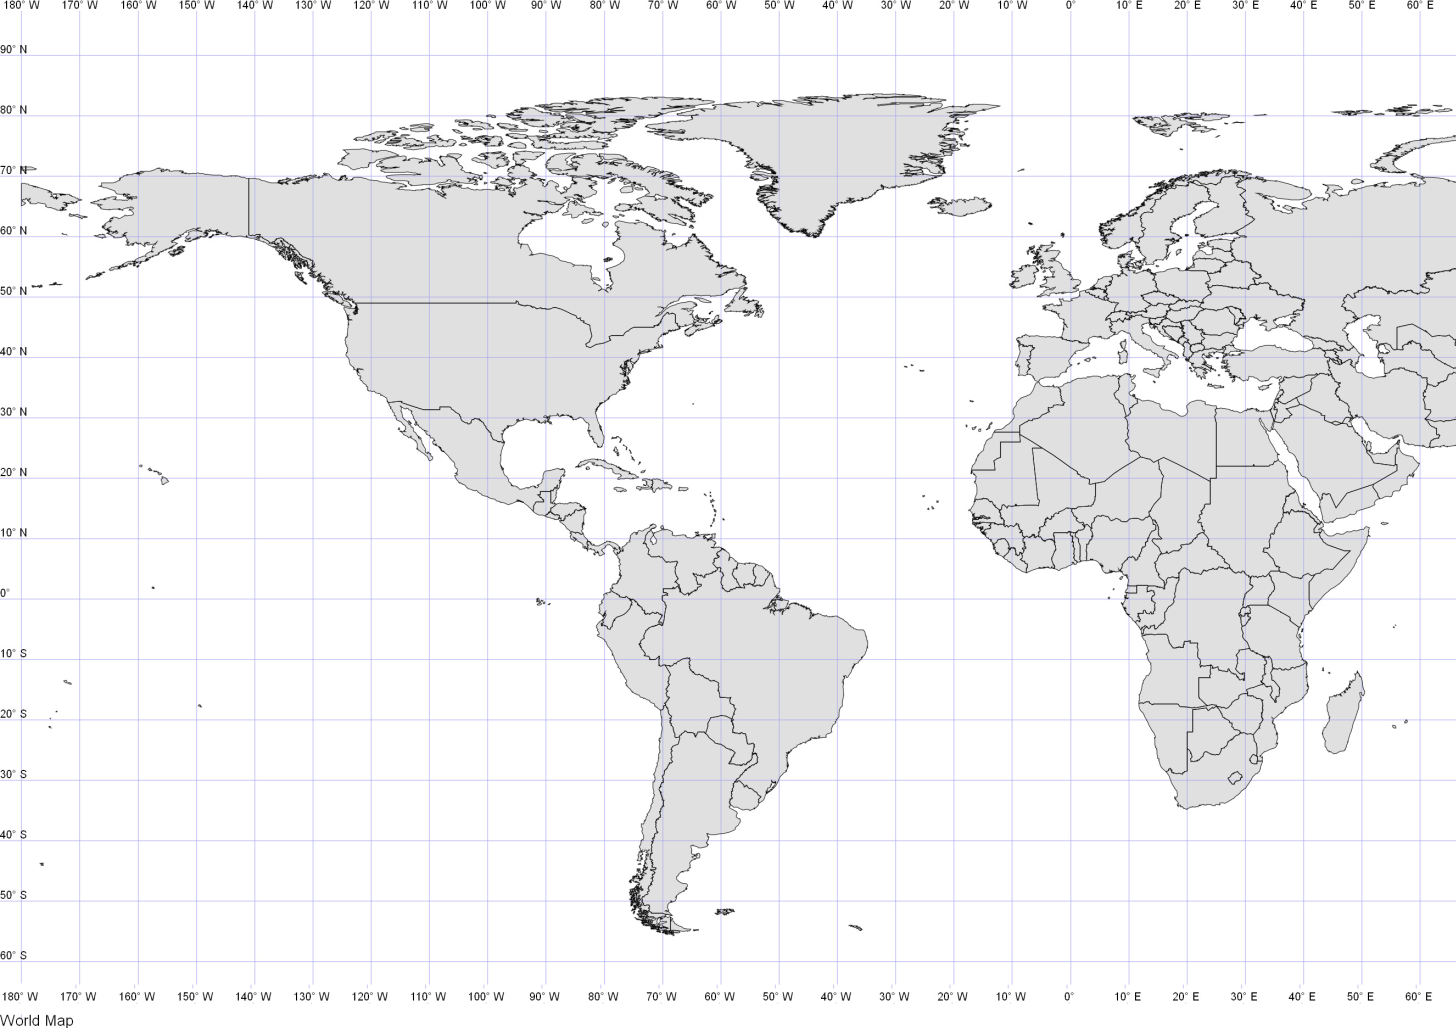

# **Example 1 (Multimission): Klyuchevskaya Eruption - Kamchatka Peninsula**

**Note:** When running each example for the first time, the execution will take a little longer. After that, it will be faster.

--------------------------------------------------------------------------------------------------------------------------------------
Deleting the old file...

Plotting the file:
/content/sample_data/GLOBAL_mumi_wideareacoverage_rgb_ash_2023-11-01T18-00Z.tif

Total processing time (satellite): 19.81 seconds.
--------------------------------------------------------------------------------------------------------------------------------------


'output/georing_ash_2023-11-01_18:00.png'

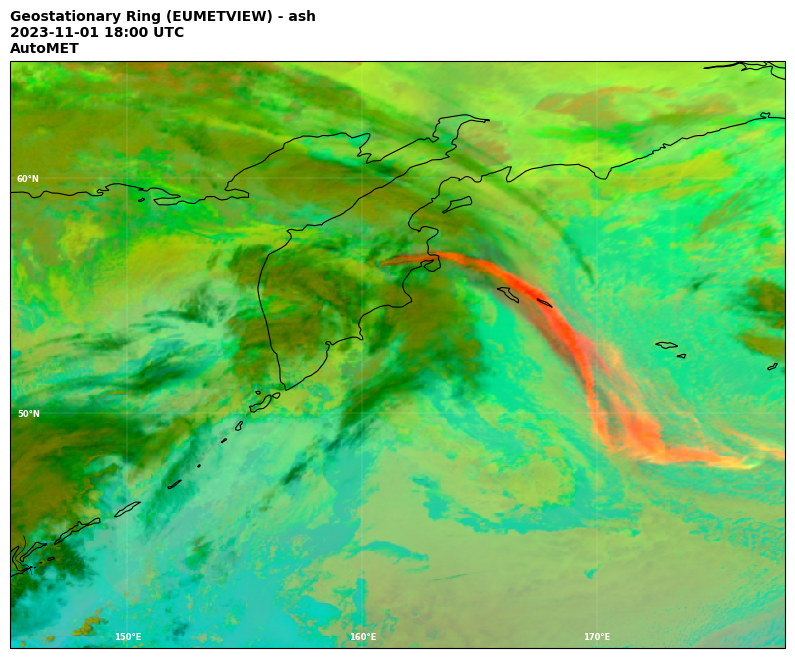

In [ ]:
#-------------------------------------------------------------------------------------------------------------------
# Training - Satellite Data Access and Processing - Example 1: Klyuchevskaya Eruption - Kamchatka Peninsula
# Author: Diego Souza (INPE/CGCT/DISSM)
#-------------------------------------------------------------------------------------------------------------------

# geostationary ring available since June 06 2021 18:00 UTC '2021-06-06 18:00' (note: data available every 3 hours)
# available composites: 'ir108', 'airmass', 'natural_color', 'ash', 'dust'
# max. res: 6
plot_ring(date_sat='2023-11-01 18:00',
          composite='ash',
          resolution=6,
          area='custom',
          extent=[145.0, 40.00, 178.00, 65.00],
          coast_color='black',
          countries_color='black',
          grid_color='white',
          overwrite=True,
          figsize=[10,10])

# **Example 2 (GOES-West): Klyuchevskaya Eruption - Kamchatka Peninsula**

--------------------------------------------------------------------------------------------------------------------------------------
File /content/sample_data/OR_ABI-L2-MCMIPF-M6_G18_s20233051800211_e20233051809519_c20233051810000.nc already exists

Plotting the file:
/content/sample_data/OR_ABI-L2-MCMIPF-M6_G18_s20233051800211_e20233051809519_c20233051810000.nc




2024-01-17 19:49:11,731 WARNING: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total processing time (satellite): 3.89 seconds.
--------------------------------------------------------------------------------------------------------------------------------------


'output/goes18_so2_2023-11-01_18:00.png'

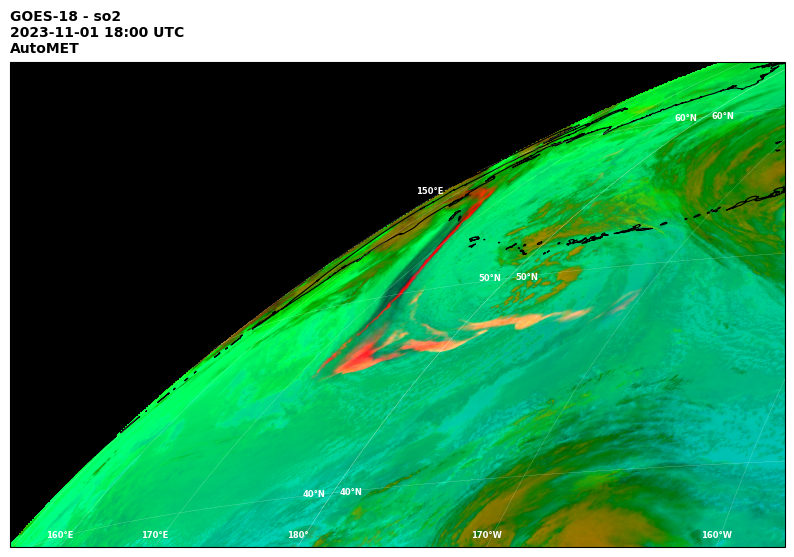

In [ ]:
#-------------------------------------------------------------------------------------------------------------------
# Training - Satellite Data Access and Processing - Example 2: Klyuchevskaya Eruption - Kamchatka Peninsula
# Author: Diego Souza (INPE/CGCT/DISSM)
#-------------------------------------------------------------------------------------------------------------------

# 'goes16' data available since July 10 2017, 'goes17' since August 28 2018, 'goes18' since August 02 2022
# note: please consider that goes-16 generated images every 15 minutes (instead of 10) until a few months after launch

# available composites for GOES-R (the options below have been tested):
# 'C01, 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16',
# 'airmass', 'ash', 'cimss_cloud_type', 'cimss_true_color', 'cimss_true_color_sunz_rayleigh', 'cira_day_convection', 'cira_fire_temperature', 'cloud_phase', 'cloud_phase_distinction',
# 'cloudtop', 'color_infrared', 'colorized_ir_clouds', 'convection', 'day_microphysics', 'dust', 'fire_temperature_awips', 'fog', 'green_snow', 'land_cloud', 'natural_color', 'night_fog',
# 'night_microphysics', 'overview', 'rocket_plume_day', 'rocket_plume_night', 'snow', 'so2', 'tropical_airmass', 'true_color', 'water_vapors1', 'water_vapors2'

plot_sat(sat='goes18',
         date_sat='2023-11-01 18:00',
         composite='so2',
         area='custom_geo',
         extent=[145.0, 40.00, 178.00, 65.00],
         coast_color='black',
         countries_color='black',
         grid_color='white',
         figsize=[10,10])

# **Example 3 (GOES-East): Hurricanes Katia, Irma and Jose**

--------------------------------------------------------------------------------------------------------------------------------------
File /content/sample_data/OR_ABI-L2-MCMIPF-M3_G16_s20172511745363_e20172511756141_c20172511756213.nc already exists

Plotting the file:
/content/sample_data/OR_ABI-L2-MCMIPF-M3_G16_s20172511745363_e20172511756141_c20172511756213.nc




2024-01-17 19:46:25,732 INFO: Removing Rayleigh scattering with atmosphere 'us-standard' and aerosol type 'rayleigh_only' for 'C02'
2024-01-17 19:46:25,752 INFO: Atmosphere chosen: us-standard
2024-01-17 19:46:25,858 INFO: Removing Rayleigh scattering with atmosphere 'us-standard' and aerosol type 'rayleigh_only' for 'C01'
2024-01-17 19:46:25,878 INFO: Atmosphere chosen: us-standard
2024-01-17 19:46:38,777 WARNING: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total processing time (satellite): 20.01 seconds.
--------------------------------------------------------------------------------------------------------------------------------------


'output/goes16_true_color_2017-09-08_17:45.png'

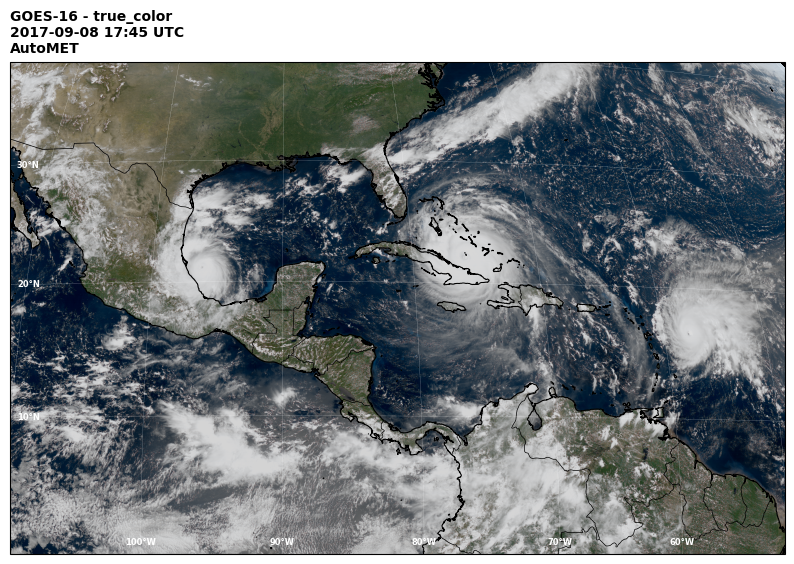

In [ ]:
#-------------------------------------------------------------------------------------------------------------------
# Training - Satellite Data Access and Processing - Example 3: Hurricanes Katia, Irma and Jose
# Author: Diego Souza (INPE/CGCT/DISSM)
#-------------------------------------------------------------------------------------------------------------------

# 'goes16' data available since July 10 2017, 'goes17' since August 28 2018, 'goes18' since August 02 2022
# note: please consider that goes-16 generated images every 15 minutes (instead of 10) until a few months after launch

# available composites for GOES-R (the options below have been tested):
# 'C01, 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16',
# 'airmass', 'ash', 'cimss_cloud_type', 'cimss_true_color', 'cimss_true_color_sunz_rayleigh', 'cira_day_convection', 'cira_fire_temperature', 'cloud_phase', 'cloud_phase_distinction',
# 'cloudtop', 'color_infrared', 'colorized_ir_clouds', 'convection', 'day_microphysics', 'dust', 'fire_temperature_awips', 'fog', 'green_snow', 'land_cloud', 'natural_color', 'night_fog',
# 'night_microphysics', 'overview', 'rocket_plume_day', 'rocket_plume_night', 'snow', 'so2', 'tropical_airmass', 'true_color', 'water_vapors1', 'water_vapors2'

plot_sat(sat='goes16',
         date_sat='2017-09-08 17:45',
         composite='true_color',
         area='custom_geo',
         extent=[-110.0, 0.00, -50.00, 40.00],
         coast_color='black',
         countries_color='black',
         grid_color='white',
         figsize=[10,10])

# **Example 4 (GOES-East): Sahara Dust Plume**

--------------------------------------------------------------------------------------------------------------------------------------

Plotting the file:
/content/sample_data/OR_ABI-L2-MCMIPF-M6_G16_s20201721800228_e20201721809541_c20201721810052.nc




2024-01-17 19:45:57,228 INFO: Removing Rayleigh scattering with atmosphere 'us-standard' and aerosol type 'rayleigh_only' for 'C02'
2024-01-17 19:45:57,247 INFO: Atmosphere chosen: us-standard
2024-01-17 19:45:57,348 INFO: Removing Rayleigh scattering with atmosphere 'us-standard' and aerosol type 'rayleigh_only' for 'C01'
2024-01-17 19:45:57,367 INFO: Atmosphere chosen: us-standard
2024-01-17 19:46:10,982 WARNING: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total processing time (satellite): 30.63 seconds.
--------------------------------------------------------------------------------------------------------------------------------------


'output/goes16_true_color_2020-06-20_18:00.png'

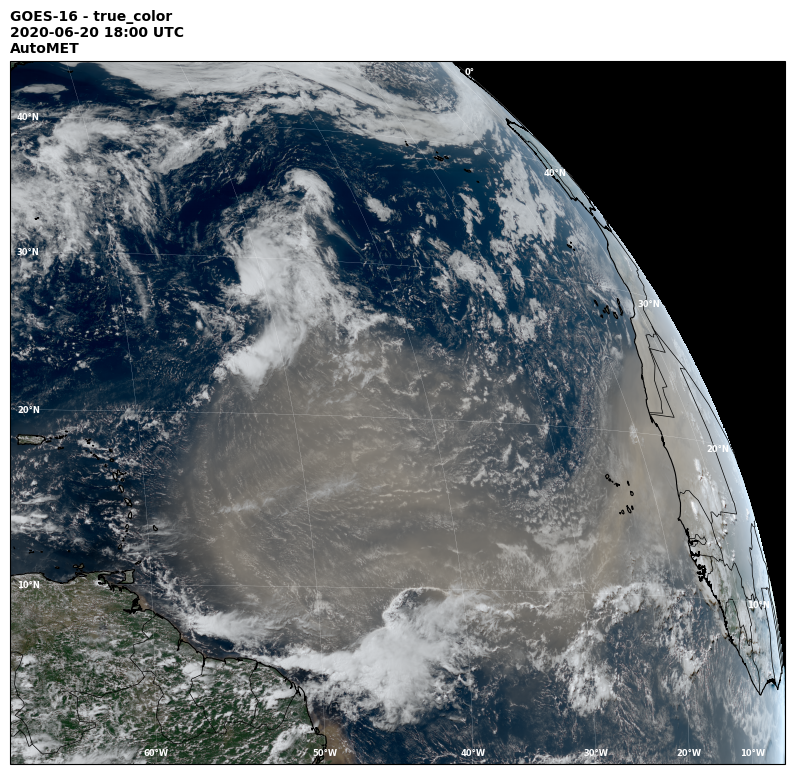

In [ ]:
#-------------------------------------------------------------------------------------------------------------------
# Training - Satellite Data Access and Processing - Example 4: Sahara Dust Plume
# Author: Diego Souza (INPE/CGCT/DISSM)
#-------------------------------------------------------------------------------------------------------------------

# 'goes16' data available since July 10 2017, 'goes17' since August 28 2018, 'goes18' since August 02 2022
# note: please consider that goes-16 generated images every 15 minutes (instead of 10) until a few months after launch

# available composites for GOES-R (the options below have been tested):
# 'C01, 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16',
# 'airmass', 'ash', 'cimss_cloud_type', 'cimss_true_color', 'cimss_true_color_sunz_rayleigh', 'cira_day_convection', 'cira_fire_temperature', 'cloud_phase', 'cloud_phase_distinction',
# 'cloudtop', 'color_infrared', 'colorized_ir_clouds', 'convection', 'day_microphysics', 'dust', 'fire_temperature_awips', 'fog', 'green_snow', 'land_cloud', 'natural_color', 'night_fog',
# 'night_microphysics', 'overview', 'rocket_plume_day', 'rocket_plume_night', 'snow', 'so2', 'tropical_airmass', 'true_color', 'water_vapors1', 'water_vapors2'

plot_sat(sat='goes16',
         date_sat='2020-06-20 18:00',
         composite='true_color',
         area='custom_geo',
         extent=[-65.0, 0.00, 0.00, 45.00],
         coast_color='black',
         countries_color='black',
         grid_color='white',
         figsize=[10,10])

# **Example 5 (MSG 0°): Hurricane Cararina**

--------------------------------------------------------------------------------------------------------------------------------------
Checking the EUMDAC Access Token...
This Token 9d2834ad-c75f-3483-b144-26c17193c2e7 expires 2024-01-17 20:43:10.995760

Checking if the file already exists: /content/sample_data/MSG1-SEVI-MSG15-0201-NA-20040326151237.115000000Z-NA.zip
This file doesn't exist.

Download finished.

The file has been uncompressed.

Plotting the file: /content/sample_data/MSG1-SEVI-MSG15-0201-NA-20040326151237.115000000Z-NA.nat



2024-01-17 19:58:38,784 INFO: Flipping Dataset unknown_name upsidedown.
2024-01-17 19:58:38,788 INFO: Flipping Dataset unknown_name leftright.
2024-01-17 19:58:38,849 INFO: Flipping Dataset unknown_name upsidedown.
2024-01-17 19:58:38,852 INFO: Flipping Dataset unknown_name leftright.
2024-01-17 19:58:38,921 INFO: Flipping Dataset unknown_name upsidedown.
2024-01-17 19:58:38,925 INFO: Flipping Dataset unknown_name leftright.
2024-01-17 19:58:38,984 INFO: Flipping Dataset unknown_name upsidedown.
2024-01-17 19:58:38,989 INFO: Flipping Dataset unknown_name leftright.
2024-01-17 19:58:44,053 WARNING: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total processing time (satellite): 341.45 seconds.
--------------------------------------------------------------------------------------------------------------------------------------


'output/msg0_airmass_2004-03-26_15:00.png'

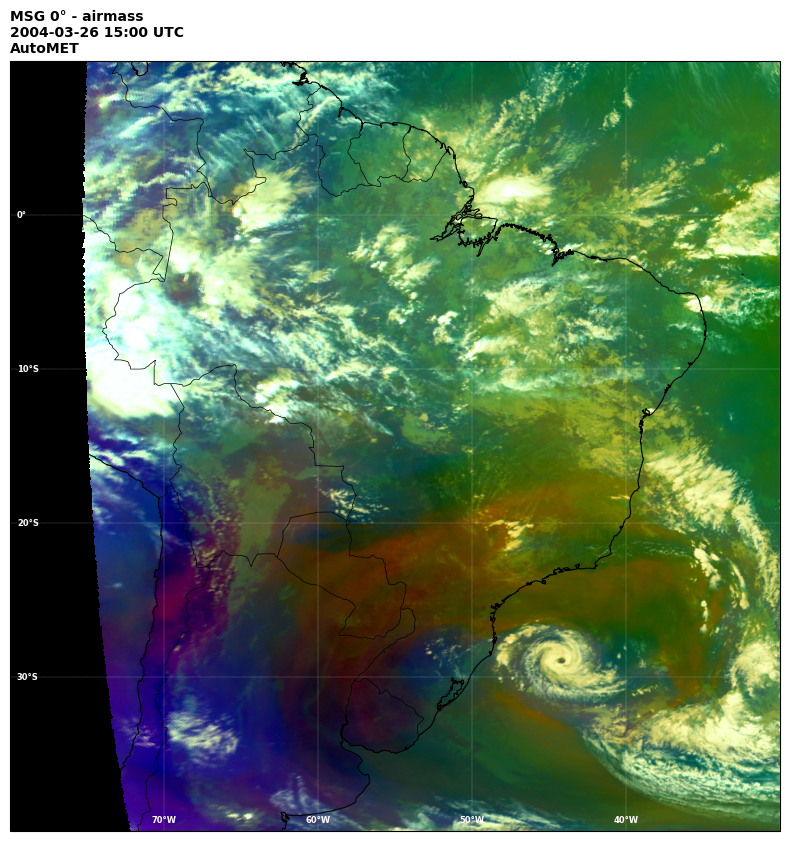

In [ ]:
#-------------------------------------------------------------------------------------------------------------------
# Training - Satellite Data Access and Processing - Example 5: Hurricane Cararina
# Author: Diego Souza (INPE/CGCT/DISSM)
#-------------------------------------------------------------------------------------------------------------------

# 'msg0' tested with data since March 26 2004 (every 15 minutes)

# select the composite (the options below have been tested):
# 'VIS006', 'VIS008', 'IR_016', 'IR_039', 'WV_062', 'WV_073', 'IR_087', 'IR_097', 'IR_108', 'IR_120', 'IR_134'
# 'airmass', 'ash', 'cloudtop', 'cloudtop_daytime', 'colorized_ir_clouds', 'convection', 'day_microphysics' 'day_microphysics_winter', 'dust', 'fog', 'green_snow', 'ir108_3d', 'ir_overview',
# 'natural_color', 'natural_color_nocorr', 'natural_color_raw', 'natural_color_raw_with_night_ir', 'natural_color_with_night_ir', 'natural_enh', 'natural_with_night_fog', 'night_fog',
# 'night_ir_alpha', 'night_microphysics', 'overview', 'overview_raw', 'rocket_plume_night', 'snow'

plot_sat(sat='msg0',
        date_sat='2004-03-26 15:00',
        composite='airmass',
        area='custom',
        extent=[-80.00, -40.00, -30.00, 10.00],
        coast_color='black',
        countries_color='black',
        grid_color='white',
        figsize=[10,10])

# **AutoMET - Facilitating Hands-on Activities for Satellite Meteorology Training**

**Developed by:** Diego Souza (https://github.com/diegormsouza) - INPE / CGCT / DISSM (Brazil)

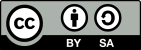